### Exploratory Data Analysis on AMEO Dataset

### Dataset Description

The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds, focuses on employment outcomes for engineering graduates. It includes dependent variables such as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical skills, and personality skills. With around 40 independent variables and 4000 data points, these variables encompass both continuous and categorical data. The dataset also includes demographic features and unique identifiers for each candidate.

### Objective

The objective of this Analysis is to gain insights and understanding from the provided dataset, particularly focusing on the relationship between various features and the target variable, which is Salary.

Specifically, the goals of this analysis include:

- Describing the dataset and its features comprehensively.
- Identifying any patterns or trends present in the data.
- Exploring the relationships between independent variables and the target variable (Salary).
- Identifying any outliers or anomalies in the data.


In [8]:
pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
np.random.seed(1111)

In [10]:
data = pd.read_csv('../Dataset/data.csv')
data.head()

Unnamed: 0      ID   Salary            DOJ            DOL   
0      train  203097   420000  6/1/2012 0:00        present  \
1      train  579905   500000  9/1/2013 0:00        present   
2      train  810601   325000  6/1/2014 0:00        present   
3      train  267447  1100000  7/1/2011 0:00        present   
4      train  343523   200000  3/1/2014 0:00  3/1/2015 0:00   

                Designation    JobCity Gender             DOB  10percentage   
0   senior quality engineer  Bangalore      f  2/19/1990 0:00          84.3  \
1         assistant manager     Indore      m  10/4/1989 0:00          85.4   
2          systems engineer    Chennai      f   8/3/1992 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/1989 0:00          85.6   
4                       get    Manesar      m  2/27/1991 0:00          78.0   

                          10board  12graduation  12percentage   
0  board ofsecondary education,ap          2007          95.8  \
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree   
0  board of intermediate education,ap       1141            2  B.Tech/B.E.  \
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID   
0                       computer engineering       78.00           1141  \
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant   
0                0  Andhra Pradesh            2011      515      585    525  \
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience   
0  0.635979                  445                     -1               -1  \
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness   
0              -1              -1           -1         -1             0.9737  \
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

#### Removing Unwanted Columns

In [11]:
data = data.drop(columns=['Unnamed: 0', 'ID', 'CollegeID', 'CollegeCityID'])
data.head()

Salary            DOJ            DOL               Designation    JobCity   
0   420000  6/1/2012 0:00        present   senior quality engineer  Bangalore  \
1   500000  9/1/2013 0:00        present         assistant manager     Indore   
2   325000  6/1/2014 0:00        present          systems engineer    Chennai   
3  1100000  7/1/2011 0:00        present  senior software engineer    Gurgaon   
4   200000  3/1/2014 0:00  3/1/2015 0:00                       get    Manesar   

  Gender             DOB  10percentage                         10board   
0      f  2/19/1990 0:00          84.3  board ofsecondary education,ap  \
1      m  10/4/1989 0:00          85.4                            cbse   
2      f   8/3/1992 0:00          85.0                            cbse   
3      m  12/5/1989 0:00          85.6                            cbse   
4      m  2/27/1991 0:00          78.0                            cbse   

   12graduation  12percentage                             12board   
0          2007          95.8  board of intermediate education,ap  \
1          2007          85.0                                cbse   
2          2010          68.2                                cbse   
3          2007          83.6                                cbse   
4          2008          76.8                                cbse   

   CollegeTier       Degree                             Specialization   
0            2  B.Tech/B.E.                       computer engineering  \
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  CollegeCityTier    CollegeState  GraduationYear  English   
0       78.00                0  Andhra Pradesh            2011      515  \
1       70.06                0  Madhya Pradesh            2012      695   
2       70.00                0   Uttar Pradesh            2014      615   
3       74.64                1           Delhi            2011      635   
4       73.90                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon   
0      585    525  0.635979                  445                     -1  \
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg   
0               -1              -1              -1           -1         -1  \
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism   
0             0.9737         0.8128        0.5269      1.35490  \
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295

#### Data Type Conversion

DOL - Date of Leaving. 
The survey was conducted back in 2015 and therefore making an assumption that the respondents who responded as **PRESENT** for DOL actually left the company within 2015 only. So, we will replace **PRESENT** value in DOL with 2015-12-31. Then we convert the datetype to datetime.

In [12]:
data['DOL'].replace('present', '2015-12-31',inplace=True)
data['DOL'] = pd.to_datetime(data['DOL'], format='mixed')
data['DOJ'] = pd.to_datetime(data['DOJ'])

In [13]:
data.head()

Salary        DOJ        DOL               Designation    JobCity Gender   
0   420000 2012-06-01 2015-12-31   senior quality engineer  Bangalore      f  \
1   500000 2013-09-01 2015-12-31         assistant manager     Indore      m   
2   325000 2014-06-01 2015-12-31          systems engineer    Chennai      f   
3  1100000 2011-07-01 2015-12-31  senior software engineer    Gurgaon      m   
4   200000 2014-03-01 2015-03-01                       get    Manesar      m   

              DOB  10percentage                         10board  12graduation   
0  2/19/1990 0:00          84.3  board ofsecondary education,ap          2007  \
1  10/4/1989 0:00          85.4                            cbse          2007   
2   8/3/1992 0:00          85.0                            cbse          2010   
3  12/5/1989 0:00          85.6                            cbse          2007   
4  2/27/1991 0:00          78.0                            cbse          2008   

   12percentage                             12board  CollegeTier       Degree   
0          95.8  board of intermediate education,ap            2  B.Tech/B.E.  \
1          85.0                                cbse            2  B.Tech/B.E.   
2          68.2                                cbse            2  B.Tech/B.E.   
3          83.6                                cbse            1  B.Tech/B.E.   
4          76.8                                cbse            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityTier   
0                       computer engineering       78.00                0  \
1  electronics and communication engineering       70.06                0   
2                     information technology       70.00                0   
3                       computer engineering       74.64                1   
4  electronics and communication engineering       73.90                0   

     CollegeState  GraduationYear  English  Logical  Quant    Domain   
0  Andhra Pradesh            2011      515      585    525  0.635979  \
1  Madhya Pradesh            2012      695      610    780  0.960603   
2   Uttar Pradesh            2014      615      545    370  0.450877   
3           Delhi            2011      635      585    625  0.974396   
4   Uttar Pradesh            2012      545      625    465  0.124502   

   ComputerProgramming  ElectronicsAndSemicon  ComputerScience   
0                  445                     -1               -1  \
1                   -1                    466               -1   
2                  395                     -1               -1   
3                  615                     -1               -1   
4                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness   
0              -1              -1           -1         -1             0.9737  \
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

In [14]:
data.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                              object
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


In [15]:
categorical = ['Designation','JobCity', 'Gender','10board','12board','CollegeTier','Degree',
              'Specialization','CollegeCityTier','CollegeState']
for cat in categorical:
    data[cat] = data[cat].astype('category')

In [16]:
data.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                    category
JobCity                        category
Gender                         category
DOB                              object
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
CollegeTier                    category
Degree                         category
Specialization                 category
collegeGPA                      float64
CollegeCityTier                category
CollegeState                   category
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


#### Identifying the points where date of leaving is earlier than date of joining

In [17]:
dates = data[(data['DOL'] < data['DOJ'])].shape[0]
print(f'DOL is earlier than DOJ for {dates} observations.')
print(data.shape)

DOL is earlier than DOJ for 40 observations.
(3998, 35)


In [18]:
data = data.drop(data[~(data['DOL'] > data['DOJ'])].index)
print(data.shape)

(3943, 35)


#### Validating 10, 12 percentage and college CGPA

In [19]:
print((data['10percentage'] <=10).sum())
print((data['12percentage'] <=10).sum())
print((data['collegeGPA'] <=10).sum())

0
0
12


#### Converting the 12 entries of College GPA to percentage

In [20]:
data.loc[data['collegeGPA']<=10,'collegeGPA'] = (data.loc[data['collegeGPA']<=10,'collegeGPA']/10)*100

Validating if there exist 0 or -1 in the dataset

In [21]:
print((data==0).sum()[(data==0).sum() > 0])

CollegeCityTier    2761
GraduationYear        1
dtype: int64


In [22]:
(data==-1).sum()[(data==-1).sum()>0]/len(data)*100

Domain                    6.137459
ComputerProgramming      21.836165
ElectronicsAndSemicon    71.392341
ComputerScience          77.605884
MechanicalEngg           94.040071
ElectricalEngg           96.094344
TelecomEngg              90.565559
CivilEngg                98.934821
dtype: float64

* According to the description of the columns:
1. 10board
2. 12board
3. graduationyear
4. jobcity
5. domain

**The above columns cannot have zeros or -1 as their inputs and hence they should be considered as null values and therefore imputed**

* The following columns describes subjects which are optional for the exam and that is why they have large number of -1(null values). Hence we will be dropping the columns out of analysis in which the percentage for -1 values is greater than or equal to 80% and for the rest of them, we will impute the values as zero.
1. electronicsandsemicon          
2. computerscience          
3. mechanicalengg           
4. electricalengg           
5. telecomengg   
6. civilengg                

In [23]:
data = data.drop(columns = ['MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'])

In [24]:
data['10board'] = data['10board'].astype(str).replace({'0':np.nan})
data['12board'] = data['12board'].astype(str).replace({'0':np.nan})
data['GraduationYear'] = data['GraduationYear'].replace({0:np.nan})
data['JobCity'] = data['JobCity'].astype(str).replace({'-1':np.nan})
data['Domain'] = data['Domain'].replace({-1:np.nan})
data['ElectronicsAndSemicon'] = data['ElectronicsAndSemicon'].replace({-1:0})
data['ComputerScience'] = data['ComputerScience'].replace({-1:0})
data['ComputerProgramming'] = data['ComputerProgramming'].replace({-1:np.nan})

In [25]:
data['10board'] = data['10board'].astype('category')
data['12board'] = data['12board'].astype('category')
data['JobCity'] = data['JobCity'].astype('category')

In [26]:
data

Salary        DOJ        DOL                  Designation   
0      420000 2012-06-01 2015-12-31      senior quality engineer  \
1      500000 2013-09-01 2015-12-31            assistant manager   
2      325000 2014-06-01 2015-12-31             systems engineer   
3     1100000 2011-07-01 2015-12-31     senior software engineer   
4      200000 2014-03-01 2015-03-01                          get   
...       ...        ...        ...                          ...   
3992   800000 2014-04-01 2015-04-01                      manager   
3993   280000 2011-10-01 2012-10-01            software engineer   
3995   320000 2013-07-01 2015-12-31  associate software engineer   
3996   200000 2014-07-01 2015-01-01           software developer   
3997   400000 2013-02-01 2015-12-31      senior systems engineer   

               JobCity Gender             DOB  10percentage   
0            Bangalore      f  2/19/1990 0:00         84.30  \
1               Indore      m  10/4/1989 0:00         85.40   
2              Chennai      f   8/3/1992 0:00         85.00   
3              Gurgaon      m  12/5/1989 0:00         85.60   
4              Manesar      m  2/27/1991 0:00         78.00   
...                ...    ...             ...           ...   
3992            Rajkot      m  6/22/1990 0:00         73.00   
3993        New Delhi       m  4/15/1987 0:00         52.09   
3995         Bangalore      m   7/3/1991 0:00         81.86   
3996  Asifabadbanglore      f  3/20/1992 0:00         78.72   
3997           Chennai      f  2/26/1991 0:00         70.60   

                             10board  12graduation  12percentage   
0     board ofsecondary education,ap          2007         95.80  \
1                               cbse          2007         85.00   
2                               cbse          2010         68.20   
3                               cbse          2007         83.60   
4                               cbse          2008         76.80   
...                              ...           ...           ...   
3992                             NaN          2008         54.00   
3993                            cbse          2006         55.50   
3995                      bse,odisha          2008         65.50   
3996                     state board          2010         69.88   
3997                            cbse          2008         68.00   

                                 12board CollegeTier       Degree   
0     board of intermediate education,ap           2  B.Tech/B.E.  \
1                                   cbse           2  B.Tech/B.E.   
2                                   cbse           2  B.Tech/B.E.   
3                                   cbse           1  B.Tech/B.E.   
4                                   cbse           2  B.Tech/B.E.   
...                                  ...         ...          ...   
3992                                 NaN           2  B.Tech/B.E.   
3993                                cbse           2  B.Tech/B.E.   
3995                         chse,odisha           2  B.Tech/B.E.   
3996                         state board           2  B.Tech/B.E.   
3997                                cbse           2  B.Tech/B.E.   

                                 Specialization  collegeGPA CollegeCityTier   
0                          computer engineering       78.00               0  \
1     electronics and communication engineering       70.06               0   
2                        information technology       70.00               0   
3                          computer engineering       74.64               1   
4     electronics and communication engineering       73.90               0   
...                                         ...         ...             ...   
3992                          civil engineering       79.00               0   
3993                     information technology       61.50               0   
3995                       computer engineering       70.00               0 

Imputing categorical columns with mode values for their respective columns.

In [27]:
data['10board'].fillna(data['10board'].mode()[0], inplace = True)
data['12board'].fillna(data['12board'].mode()[0], inplace = True)
data['GraduationYear'].fillna(data['GraduationYear'].mode()[0], inplace = True)
data['JobCity'].fillna(data['JobCity'].mode()[0], inplace = True)

Imputing the numerical columns with median values for their respective columns.

In [28]:
data['Domain'].fillna(data['Domain'].median(), inplace = True)
data['ComputerProgramming'].fillna(data['ComputerProgramming'].median(), inplace = True)

In [29]:
data.head()

Salary        DOJ        DOL               Designation    JobCity Gender   
0   420000 2012-06-01 2015-12-31   senior quality engineer  Bangalore      f  \
1   500000 2013-09-01 2015-12-31         assistant manager     Indore      m   
2   325000 2014-06-01 2015-12-31          systems engineer    Chennai      f   
3  1100000 2011-07-01 2015-12-31  senior software engineer    Gurgaon      m   
4   200000 2014-03-01 2015-03-01                       get    Manesar      m   

              DOB  10percentage                         10board  12graduation   
0  2/19/1990 0:00          84.3  board ofsecondary education,ap          2007  \
1  10/4/1989 0:00          85.4                            cbse          2007   
2   8/3/1992 0:00          85.0                            cbse          2010   
3  12/5/1989 0:00          85.6                            cbse          2007   
4  2/27/1991 0:00          78.0                            cbse          2008   

   12percentage                             12board CollegeTier       Degree   
0          95.8  board of intermediate education,ap           2  B.Tech/B.E.  \
1          85.0                                cbse           2  B.Tech/B.E.   
2          68.2                                cbse           2  B.Tech/B.E.   
3          83.6                                cbse           1  B.Tech/B.E.   
4          76.8                                cbse           2  B.Tech/B.E.   

                              Specialization  collegeGPA CollegeCityTier   
0                       computer engineering       78.00               0  \
1  electronics and communication engineering       70.06               0   
2                     information technology       70.00               0   
3                       computer engineering       74.64               1   
4  electronics and communication engineering       73.90               0   

     CollegeState  GraduationYear  English  Logical  Quant    Domain   
0  Andhra Pradesh          2011.0      515      585    525  0.635979  \
1  Madhya Pradesh          2012.0      695      610    780  0.960603   
2   Uttar Pradesh          2014.0      615      545    370  0.450877   
3           Delhi          2011.0      635      585    625  0.974396   
4   Uttar Pradesh          2012.0      545      625    465  0.124502   

   ComputerProgramming  ElectronicsAndSemicon  ComputerScience   
0                445.0                      0                0  \
1                455.0                    466                0   
2                395.0                      0                0   
3                615.0                      0                0   
4                455.0                    233                0   

   conscientiousness  agreeableness  extraversion  nueroticism   
0             0.9737         0.8128        0.5269      1.35490  \
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295

In [30]:
def correct_string_data(df):
    '''
    Convert the textual categories to lower case
    and remove the leading or trailing spaces if any.
    
    '''
    data[df] =data[df].str.lower().str.strip()

In [31]:
textual_columns = ['Designation','JobCity','10board',
                  '12board','Specialization','CollegeState']

In [32]:
for col in textual_columns:
    print(f'Number of unique values in {col} with inconsistency : {data[col].nunique()}')

Number of unique values in Designation with inconsistency : 416
Number of unique values in JobCity with inconsistency : 337
Number of unique values in 10board with inconsistency : 274
Number of unique values in 12board with inconsistency : 339
Number of unique values in Specialization with inconsistency : 46
Number of unique values in CollegeState with inconsistency : 26


In [33]:
for col in textual_columns:
    correct_string_data(col)

In [34]:
for col in textual_columns:
    print(f'Number of unique values in {col} with inconsistency : {data[col].nunique()}')

Number of unique values in Designation with inconsistency : 416
Number of unique values in JobCity with inconsistency : 230
Number of unique values in 10board with inconsistency : 272
Number of unique values in 12board with inconsistency : 336
Number of unique values in Specialization with inconsistency : 46
Number of unique values in CollegeState with inconsistency : 26


### Collapsing Categories

Since the number of categories are large enough to deal with, we keep the top 10 categories.

In [35]:
def collapsing_categories(data, data1):
    for designation in data[data1].unique():
        min_count = data[data1].value_counts()[:10].min()
        if data[data[data1] == designation][data1].value_counts()[0] < min_count:
            data.loc[data[data1] == designation, data1] = 'other'

In [36]:
for cols in textual_columns:
    collapsing_categories(data, cols)

In [37]:
for cols in textual_columns:
    print(data[cols].value_counts())
    print('*'*50)

Designation
other                         2259
software engineer              535
software developer             262
system engineer                202
programmer analyst             139
systems engineer               117
java software engineer         109
software test engineer         100
project engineer                76
technical support engineer      73
senior software engineer        71
Name: count, dtype: int64
**************************************************
JobCity
bangalore    1109
other         807
noida         382
hyderabad     361
pune          322
chennai       310
gurgaon       212
new delhi     203
mumbai        119
kolkata       118
Name: count, dtype: int64
**************************************************
10board
cbse                            1726
state board                     1140
other                            498
icse                             276
ssc                              121
up board                          85
matriculation                  

Mapping consistent categories in <b>Designation</b> and <b>Specialization</b>.

In [38]:
desig_mapping  = {'systems engineer':'system engineer'}
spec_mapping = {'electronics and communication engineering':'electronics & telecommunications',
               'electrical engineering':'electronics and electrical engineering',
               'computer engineering':'computer science & engineering'}

In [39]:
data['Designation'].replace(desig_mapping, inplace = True)
data['Specialization'].replace(spec_mapping, inplace = True)

In [40]:
data.head()

Salary        DOJ        DOL               Designation    JobCity Gender   
0   420000 2012-06-01 2015-12-31                     other  bangalore      f  \
1   500000 2013-09-01 2015-12-31                     other      other      m   
2   325000 2014-06-01 2015-12-31           system engineer    chennai      f   
3  1100000 2011-07-01 2015-12-31  senior software engineer    gurgaon      m   
4   200000 2014-03-01 2015-03-01                     other      other      m   

              DOB  10percentage 10board  12graduation  12percentage 12board   
0  2/19/1990 0:00          84.3   other          2007          95.8   other  \
1  10/4/1989 0:00          85.4    cbse          2007          85.0    cbse   
2   8/3/1992 0:00          85.0    cbse          2010          68.2    cbse   
3  12/5/1989 0:00          85.6    cbse          2007          83.6    cbse   
4  2/27/1991 0:00          78.0    cbse          2008          76.8    cbse   

  CollegeTier       Degree                    Specialization  collegeGPA   
0           2  B.Tech/B.E.    computer science & engineering       78.00  \
1           2  B.Tech/B.E.  electronics & telecommunications       70.06   
2           2  B.Tech/B.E.            information technology       70.00   
3           1  B.Tech/B.E.    computer science & engineering       74.64   
4           2  B.Tech/B.E.  electronics & telecommunications       73.90   

  CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant   
0               0  andhra pradesh          2011.0      515      585    525  \
1               0  madhya pradesh          2012.0      695      610    780   
2               0   uttar pradesh          2014.0      615      545    370   
3               1           other          2011.0      635      585    625   
4               0   uttar pradesh          2012.0      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience   
0  0.635979                445.0                      0                0  \
1  0.960603                455.0                    466                0   
2  0.450877                395.0                      0                0   
3  0.974396                615.0                      0                0   
4  0.124502                455.0                    233                0   

   conscientiousness  agreeableness  extraversion  nueroticism   
0             0.9737         0.8128        0.5269      1.35490  \
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295

### Feature Engineering 
Since the dataset was release in 2015, we add a age column by subtracting DOB year from 2015. This will add the age as of 2015.

In [41]:
data['DOB'] = pd.to_datetime(data['DOB'], format='mixed')
data['Age(2015)'] = 2015 - data['DOB'].dt.year

Adding a Tenure Column

In [42]:
data['Tenure'] = data['DOL'] - data['DOJ']
data.head()

Salary        DOJ        DOL               Designation    JobCity Gender   
0   420000 2012-06-01 2015-12-31                     other  bangalore      f  \
1   500000 2013-09-01 2015-12-31                     other      other      m   
2   325000 2014-06-01 2015-12-31           system engineer    chennai      f   
3  1100000 2011-07-01 2015-12-31  senior software engineer    gurgaon      m   
4   200000 2014-03-01 2015-03-01                     other      other      m   

         DOB  10percentage 10board  12graduation  12percentage 12board   
0 1990-02-19          84.3   other          2007          95.8   other  \
1 1989-10-04          85.4    cbse          2007          85.0    cbse   
2 1992-08-03          85.0    cbse          2010          68.2    cbse   
3 1989-12-05          85.6    cbse          2007          83.6    cbse   
4 1991-02-27          78.0    cbse          2008          76.8    cbse   

  CollegeTier       Degree                    Specialization  collegeGPA   
0           2  B.Tech/B.E.    computer science & engineering       78.00  \
1           2  B.Tech/B.E.  electronics & telecommunications       70.06   
2           2  B.Tech/B.E.            information technology       70.00   
3           1  B.Tech/B.E.    computer science & engineering       74.64   
4           2  B.Tech/B.E.  electronics & telecommunications       73.90   

  CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant   
0               0  andhra pradesh          2011.0      515      585    525  \
1               0  madhya pradesh          2012.0      695      610    780   
2               0   uttar pradesh          2014.0      615      545    370   
3               1           other          2011.0      635      585    625   
4               0   uttar pradesh          2012.0      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience   
0  0.635979                445.0                      0                0  \
1  0.960603                455.0                    466                0   
2  0.450877                395.0                      0                0   
3  0.974396                615.0                      0                0   
4  0.124502                455.0                    233                0   

   conscientiousness  agreeableness  extraversion  nueroticism   
0             0.9737         0.8128        0.5269      1.35490  \
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Age(2015)    Tenure  
0                -0.4455         25 1308 days  
1                 0.8637         26  851 days  
2                 0.6721         23  578 days  
3                -0.9194         26 1644 days  
4                -0.1295         24  365 days

Assuming that if the graduationyear is greater than or equal to date of joining.

In [43]:
len(data[(data['GraduationYear'] > data['DOJ'].dt.year)].index)

79

In [44]:
data = data.drop(data[(data['GraduationYear'] > data['DOJ'].dt.year)].index)

In [45]:
data['YearGap'] = (data['DOJ'].dt.year - data['GraduationYear'])

In [46]:
data.head()

Salary        DOJ        DOL               Designation    JobCity Gender   
0   420000 2012-06-01 2015-12-31                     other  bangalore      f  \
1   500000 2013-09-01 2015-12-31                     other      other      m   
2   325000 2014-06-01 2015-12-31           system engineer    chennai      f   
3  1100000 2011-07-01 2015-12-31  senior software engineer    gurgaon      m   
4   200000 2014-03-01 2015-03-01                     other      other      m   

         DOB  10percentage 10board  12graduation  12percentage 12board   
0 1990-02-19          84.3   other          2007          95.8   other  \
1 1989-10-04          85.4    cbse          2007          85.0    cbse   
2 1992-08-03          85.0    cbse          2010          68.2    cbse   
3 1989-12-05          85.6    cbse          2007          83.6    cbse   
4 1991-02-27          78.0    cbse          2008          76.8    cbse   

  CollegeTier       Degree                    Specialization  collegeGPA   
0           2  B.Tech/B.E.    computer science & engineering       78.00  \
1           2  B.Tech/B.E.  electronics & telecommunications       70.06   
2           2  B.Tech/B.E.            information technology       70.00   
3           1  B.Tech/B.E.    computer science & engineering       74.64   
4           2  B.Tech/B.E.  electronics & telecommunications       73.90   

  CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant   
0               0  andhra pradesh          2011.0      515      585    525  \
1               0  madhya pradesh          2012.0      695      610    780   
2               0   uttar pradesh          2014.0      615      545    370   
3               1           other          2011.0      635      585    625   
4               0   uttar pradesh          2012.0      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience   
0  0.635979                445.0                      0                0  \
1  0.960603                455.0                    466                0   
2  0.450877                395.0                      0                0   
3  0.974396                615.0                      0                0   
4  0.124502                455.0                    233                0   

   conscientiousness  agreeableness  extraversion  nueroticism   
0             0.9737         0.8128        0.5269      1.35490  \
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Age(2015)    Tenure  YearGap  
0                -0.4455         25 1308 days      1.0  
1                 0.8637         26  851 days      1.0  
2                 0.6721         23  578 days      0.0  
3                -0.9194         26 1644 days      0.0  
4                -0.1295         24  365 days      2.0

Function to calculate Cummilative Distribution (CDF)

In [47]:

def cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

In [48]:
colors = ['#CD6155','#5499C7','#AF7AC5','#48C9B0','#52BE80','#F4D03F',
         '#FA8072','#800020','#808000','#7393B3']

## Univariate Analysis

### Continuous Features

#### 1. Tenure

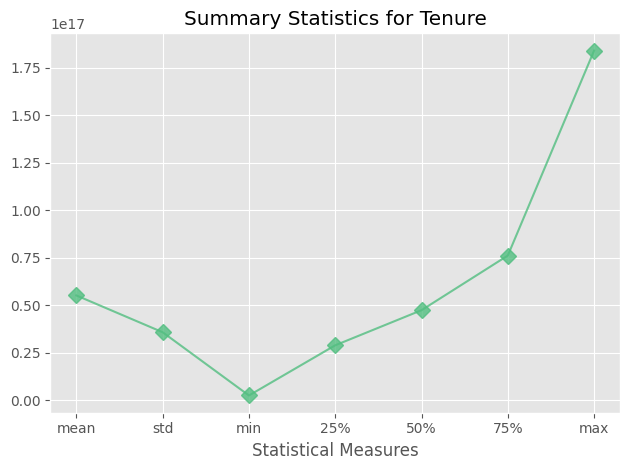

In [49]:
data['Tenure'].describe()[1:].plot(color = colors[4], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Tenure')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

In [50]:
data['Tenure'] = data['Tenure'].dt.days

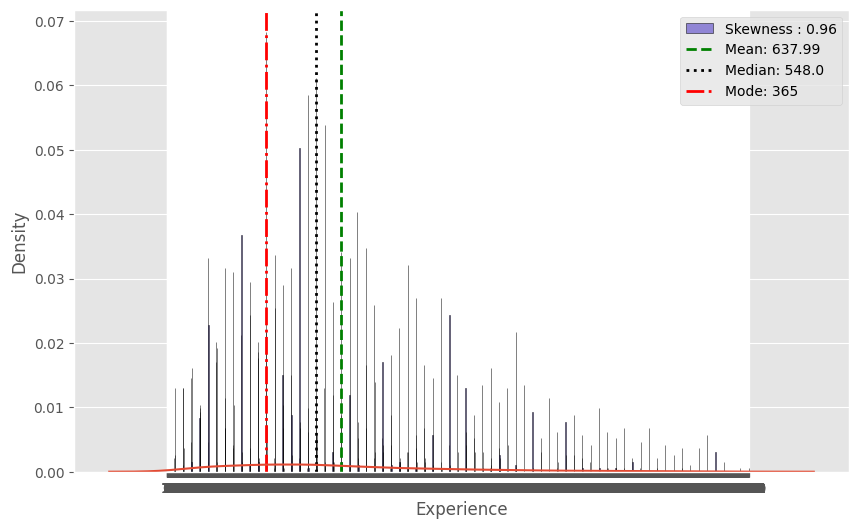

In [51]:
plt.figure(figsize = (10,6))
plt.hist(data['Tenure'],
        ec = 'k',
        bins = np.arange(0, data['Tenure'].max()+0.5, 0.5),
        color = 'slateblue',
        alpha = 0.7,
        label = f"Skewness : {round(data['Tenure'].skew(),2)}",
        density = True)
plt.xticks(ticks = np.arange(0, data['Tenure'].max()+0.5, 0.5))
plt.xlabel('Experience')
plt.ylabel('Density')
plt.axvline(data['Tenure'].mean(), label = f"Mean: {round(data['Tenure'].mean(),2)}", 
            linestyle = '--',
           color = 'green', linewidth = 2)
plt.axvline(data['Tenure'].median(), label = f"Median: {round(data['Tenure'].median(),2)}",
            linestyle = ':',
           color = 'k', linewidth = 2)
plt.axvline(data['Tenure'].mode()[0], label = f"Mode: {round(data['Tenure'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
sns.kdeplot(data['Tenure'])
plt.legend()
plt.show()

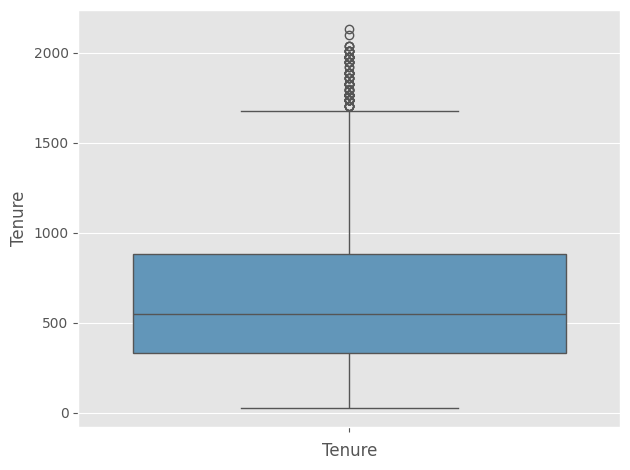

In [52]:
sns.boxplot(data['Tenure'], color = colors[1])
plt.xlabel('Tenure')
plt.tight_layout()
plt.show()

In [53]:
x_Tenure, y_Tenure = cdf(data['Tenure'])
x_sample_Tenure, y_sample_Tenure = cdf(np.random.normal(data['Tenure'].mean(), data['Tenure'].std(), size = len(data['Tenure'])))

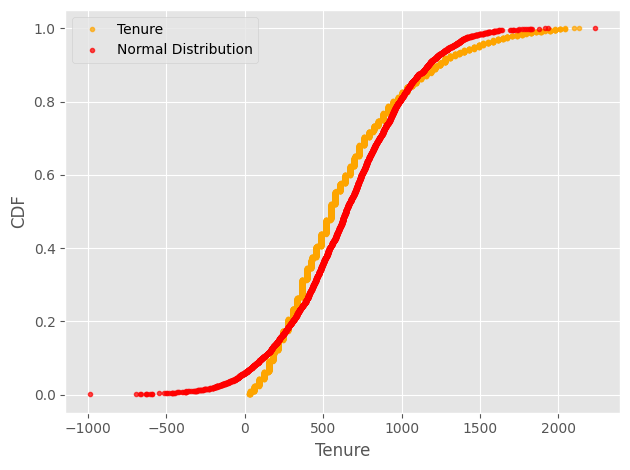

In [54]:
plt.plot(x_Tenure, y_Tenure, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_Tenure, y_sample_Tenure, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Tenure')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : The range for experience is 4 years.
2. Histogram   : The data is positively skewed i.e there exists larger number of respondents with
   low tenure. 50% data points are below 1.5 years. Average tenure is 1.5 years. The mean, median and mode lie very close to each other and skewness(0.6) is close to that of a normal(0).
3. Box Plot    : There are few values with large tenure i.e outliers
4. CDF    : The data is not normally distributed. We can say that tenure is not normally distributed. 

#### 2. Salary

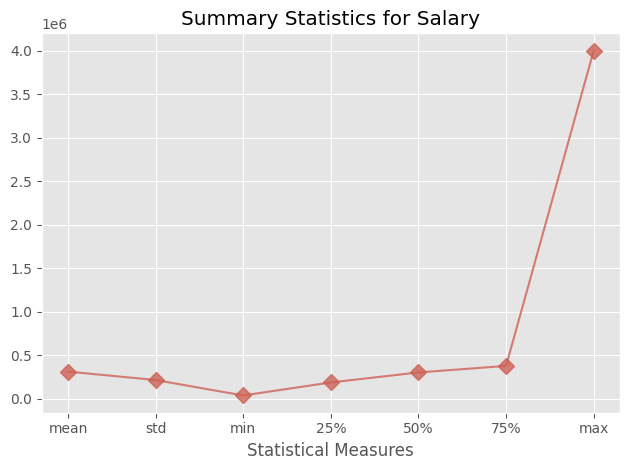

In [55]:
data['Salary'].describe()[1:].plot(color = colors[0], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Salary')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

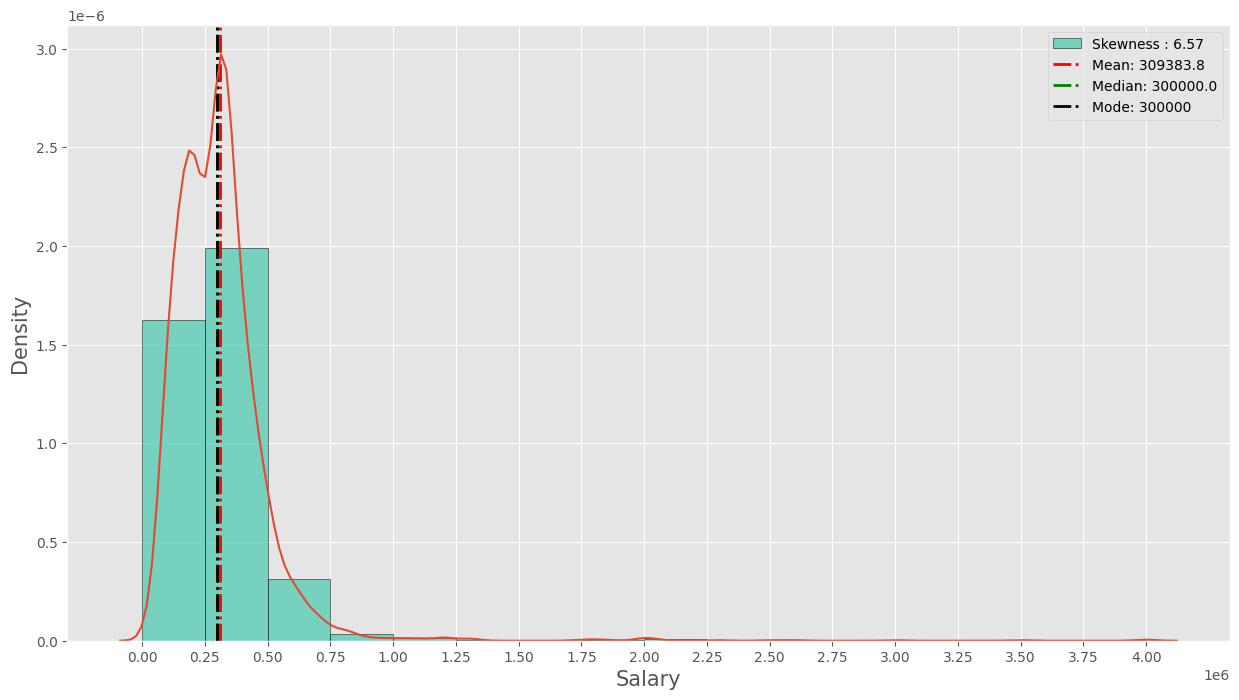

In [56]:
bins = np.arange(0, data['Salary'].max()+250000, 250000)
plt.figure(figsize = (15,8))
plt.hist(data['Salary'], ec = 'k',
        color = colors[3], bins = bins,
        label = f"Skewness : {round(data['Salary'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Salary', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(data['Salary'].mean(), label = f"Mean: {round(data['Salary'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data['Salary'].median(), label = f"Median: {round(data['Salary'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data['Salary'].mode()[0], label = f"Mode: {round(data['Salary'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(data['Salary'])
plt.legend()
plt.show()

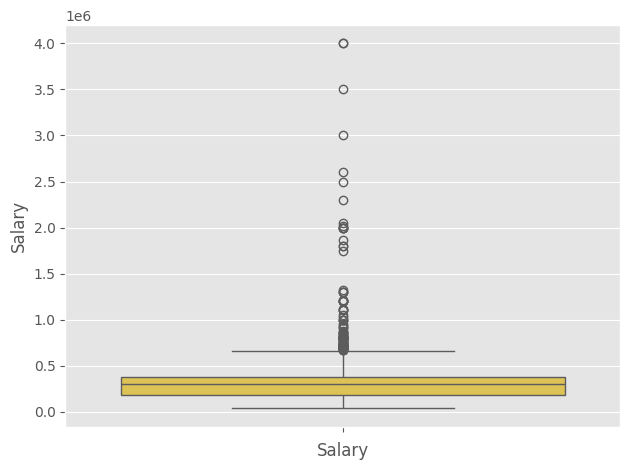

In [57]:
sns.boxplot(data['Salary'], color = colors[5])
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

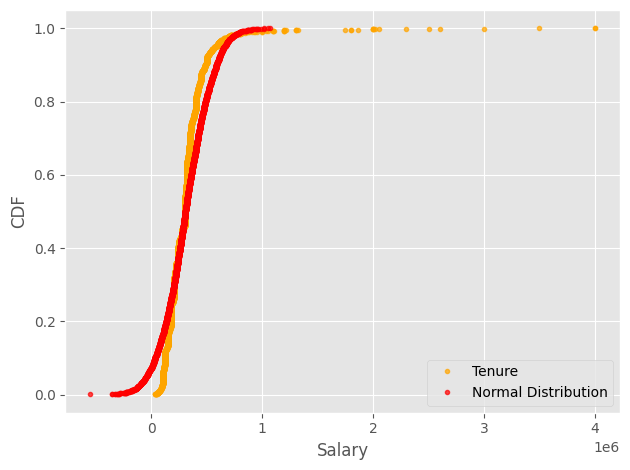

In [58]:
x_Salary, y_Salary = cdf(data['Salary'])
x_sample_Salary, y_sample_Salary = \
cdf(np.random.normal(data['Salary'].mean(), data['Salary'].std(), size = len(data['Salary'])))
plt.plot(x_Salary, y_Salary, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_Salary, y_sample_Salary, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Salary')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : There is high variation in salary..
2. Histogram   : The data is positively and highly skewed with skewness 6(approx) which is large as compared to that of normal(0). Mean, median and mode all are approximately equal.
3. Box Plot    : There are large number of data points with high salaries.
4. CDF    : The data is highly skewed and deviates largely from normal distribution. 

### 3. 10Percentage

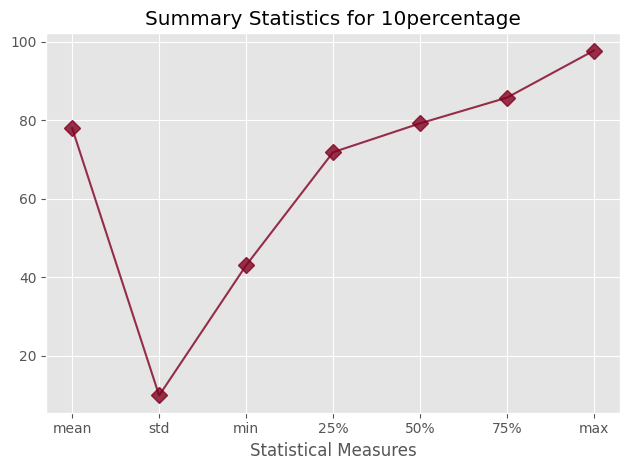

In [59]:
data['10percentage'].describe()[1:].plot(color = colors[7], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 10percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

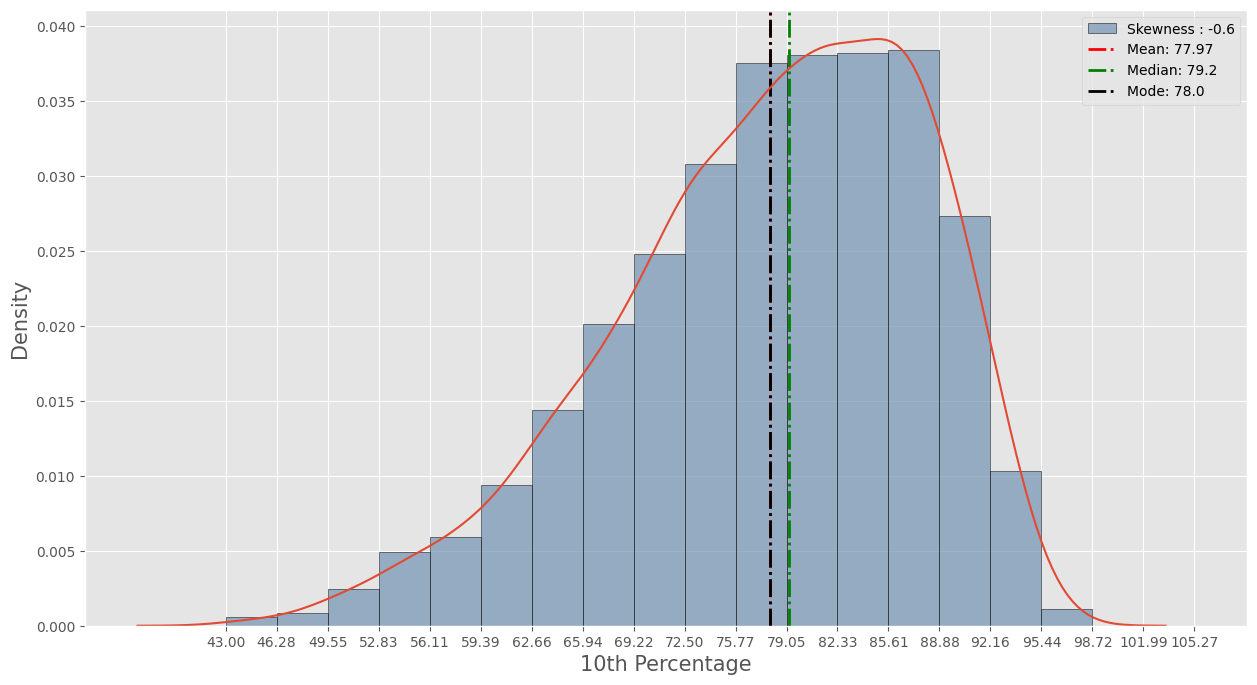

In [60]:
bins = np.arange(data['10percentage'].min(), data['10percentage'].max()+data['10percentage'].std(), 
                 data['10percentage'].std()/3)
plt.figure(figsize = (15,8))
plt.hist(data['10percentage'], ec = 'k',
        color = colors[9], bins = bins,
        label = f"Skewness : {round(data['10percentage'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('10th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(data['10percentage'].mean(), label = f"Mean: {round(data['10percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data['10percentage'].median(), label = f"Median: {round(data['10percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data['10percentage'].mode()[0], label = f"Mode: {round(data['10percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(data['10percentage'])
plt.legend()
plt.show()

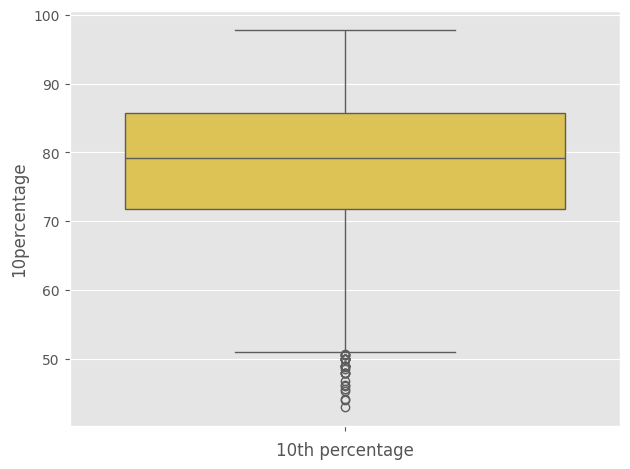

In [61]:
sns.boxplot(data['10percentage'], color = colors[5])
plt.xlabel('10th percentage')
plt.tight_layout()
plt.show()

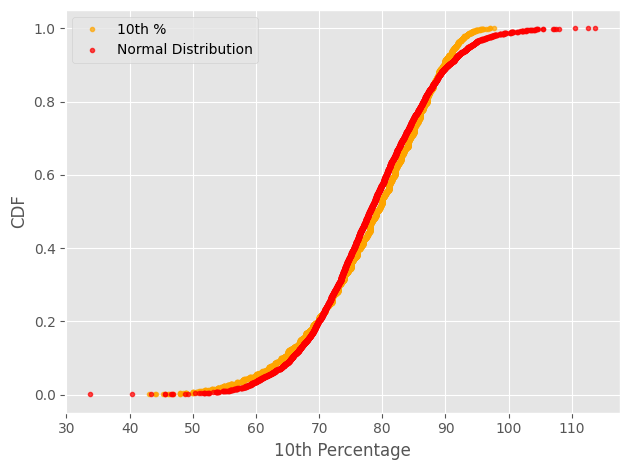

In [62]:
x_10, y_10 = cdf(data['10percentage'])
x_sample_10 , y_sample_10 = \
cdf(np.random.normal(data['10percentage'].mean(), data['10percentage'].std(), size = len(data['10percentage'])))
plt.plot(x_10, y_10, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = '10th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('10th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 50% of students scored less than approximately 80%.
2. Histogram   : There are very less students with low % and the majority of the students scored b/w 75% - 90%. Maximum number of students scored 78% and on average the score was 77%.
3. Box Plot    : The box plot shows that there are few very outliers.
4. CDF    : The data is bit skewed and not normally distributed.

### 4. 12Percentage

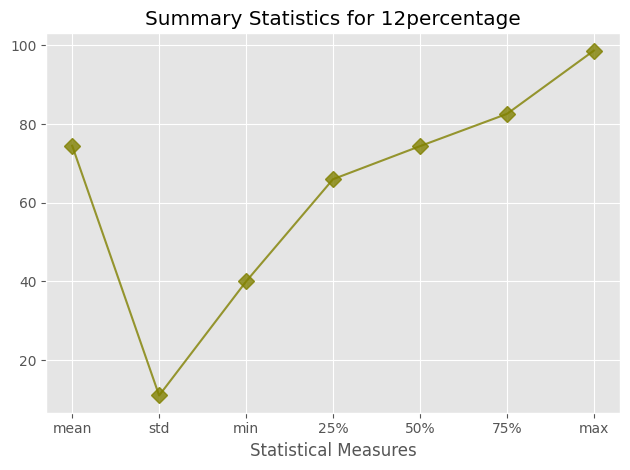

In [63]:
data['12percentage'].describe()[1:].plot(color = colors[8], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 12percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

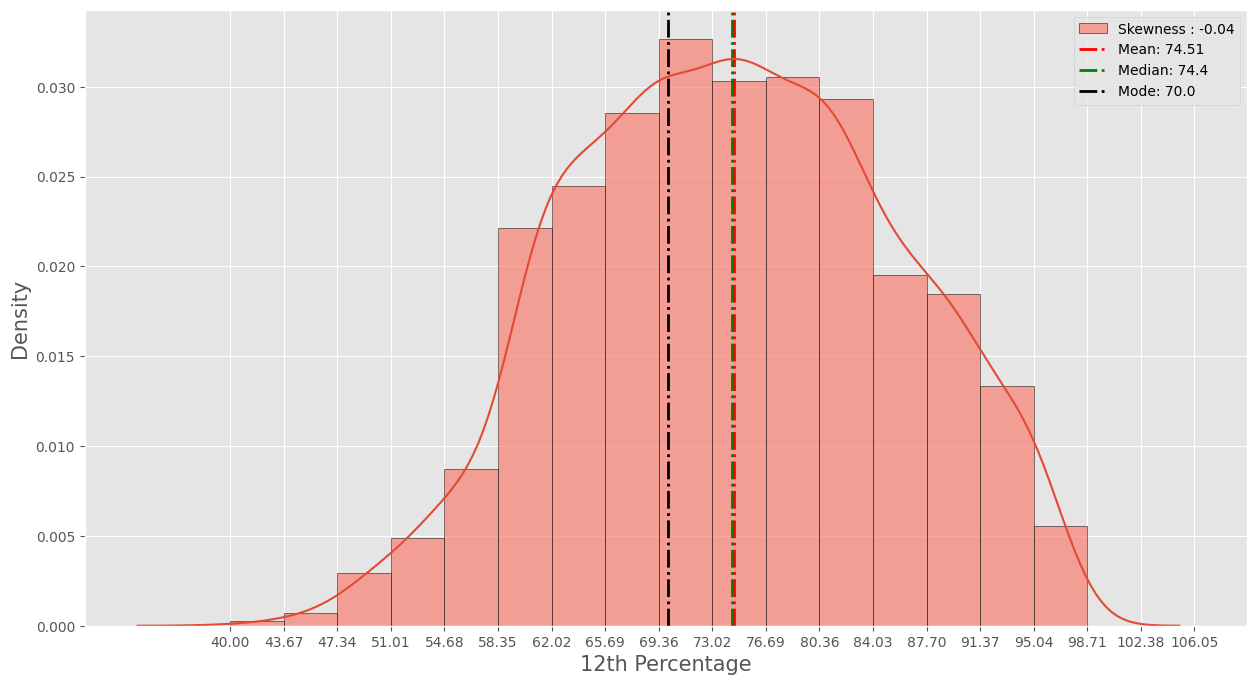

In [64]:
bins = np.arange(data['12percentage'].min(), data['12percentage'].max()+data['12percentage'].std(), 
                 data['12percentage'].std()/3)
plt.figure(figsize = (15,8))
plt.hist(data['12percentage'], ec = 'k',
        color = colors[6], bins = bins,
        label = f"Skewness : {round(data['12percentage'].skew(),2)}",
        alpha = 0.7, 
        density = True)
plt.xticks(bins)
plt.xlabel('12th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(data['12percentage'].mean(), label = f"Mean: {round(data['12percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data['12percentage'].median(), label = f"Median: {round(data['12percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data['12percentage'].mode()[0], label = f"Mode: {round(data['12percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(data['12percentage'])
plt.legend()
plt.show()

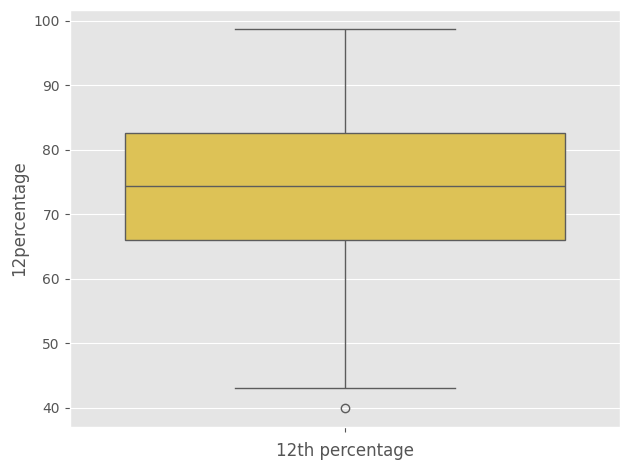

In [65]:
sns.boxplot(data['12percentage'], color = colors[5])
plt.xlabel('12th percentage')
plt.tight_layout()
plt.show()

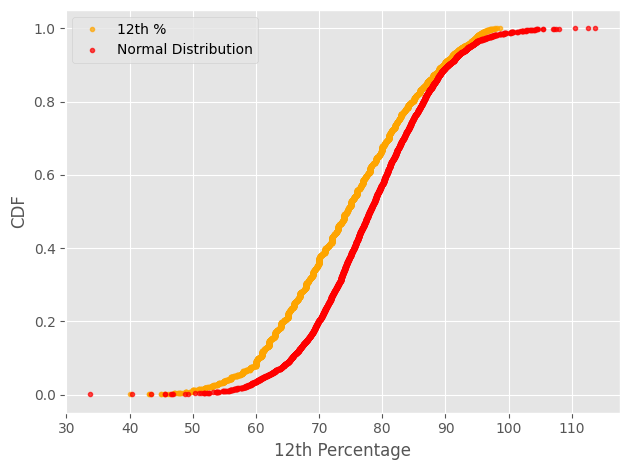

In [66]:
x_12, y_12 = cdf(data['12percentage'])
x_sample_12 , y_sample_12 = \
cdf(np.random.normal(data['12percentage'].mean(), data['12percentage'].std(), size = len(data['12percentage'])))
plt.plot(x_12, y_12, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = '12th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('12th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 50% of students scored less than approximately 78%.
2. Histogram   : There are very less students with low % and the majority of the students scored b/w 69% - 84%. Maximum number of students scored 70% and on average the score was 74%.
3. Box Plot    : The box plot shows that there is only data point with extreamly low score.
4. CDF    : The data is not normally distributed.

### 5. CollegeGPA

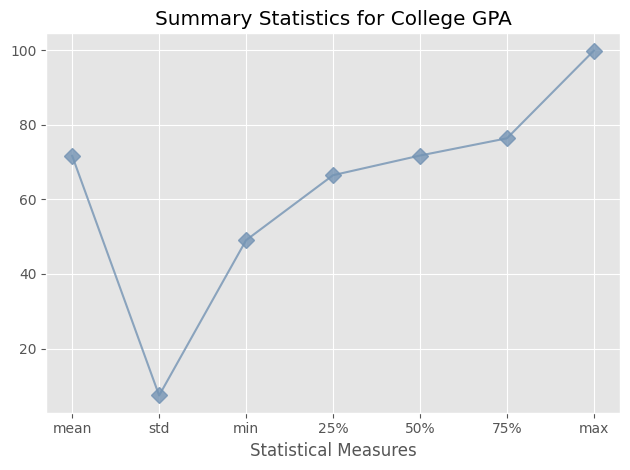

In [67]:
data['collegeGPA'].describe()[1:].plot(color = colors[9], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for College GPA')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

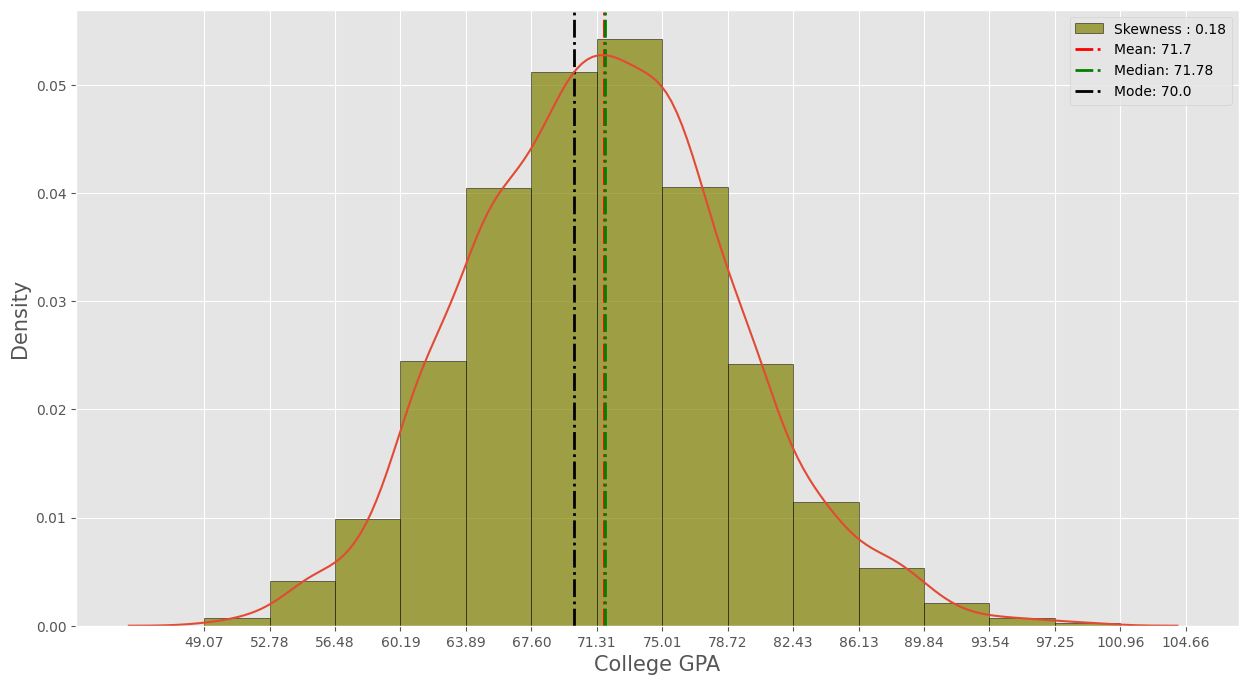

In [68]:
bins = np.arange(data['collegeGPA'].min(), data['collegeGPA'].max()+data['collegeGPA'].std(), 
                 data['collegeGPA'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(data['collegeGPA'], ec = 'k',
        color = colors[8], bins = bins,
        label = f"Skewness : {round(data['collegeGPA'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('College GPA', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(data['collegeGPA'].mean(), label = f"Mean: {round(data['collegeGPA'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data['collegeGPA'].median(), label = f"Median: {round(data['collegeGPA'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data['collegeGPA'].mode()[0], label = f"Mode: {round(data['collegeGPA'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(data['collegeGPA'])
plt.legend()
plt.show()

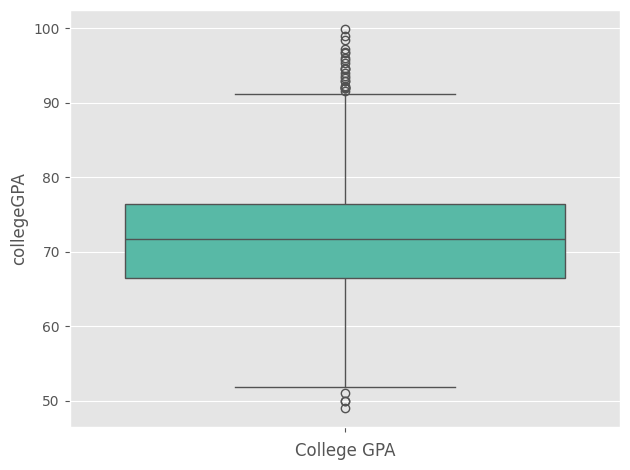

In [69]:
sns.boxplot(data['collegeGPA'], color = colors[3])
plt.xlabel('College GPA')
plt.tight_layout()
plt.show()

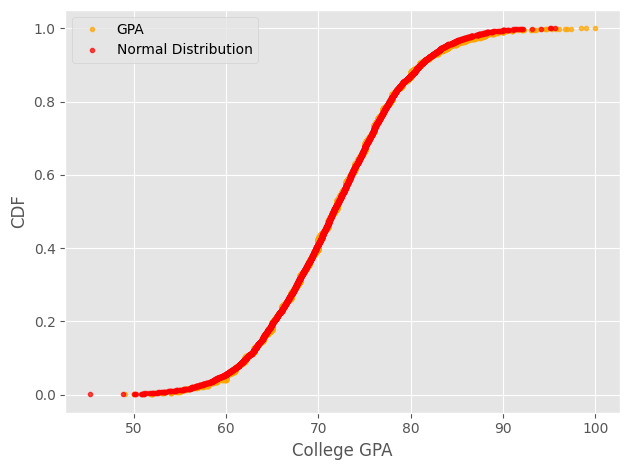

In [70]:
x_GPA, y_GPA = cdf(data['collegeGPA'])
x_sample_GPA , y_sample_GPA = \
cdf(np.random.normal(data['collegeGPA'].mean(), data['collegeGPA'].std(), size = len(data['12percentage'])))
plt.plot(x_GPA, y_GPA, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'GPA')
plt.plot(x_sample_GPA, y_sample_GPA, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('College GPA')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 75% of students GPA was less than approximately 80%.
2. Histogram   : Majority of the students GPA were in b/w 63% - 78%. Maximum number of students scored 70% and on average GPA score was 74%.
3. Box Plot    : The box plot shows that there exist low extreme values as well as high extreme values.
4. CDF    : The data is suffciently normally distributed.

### 6. English

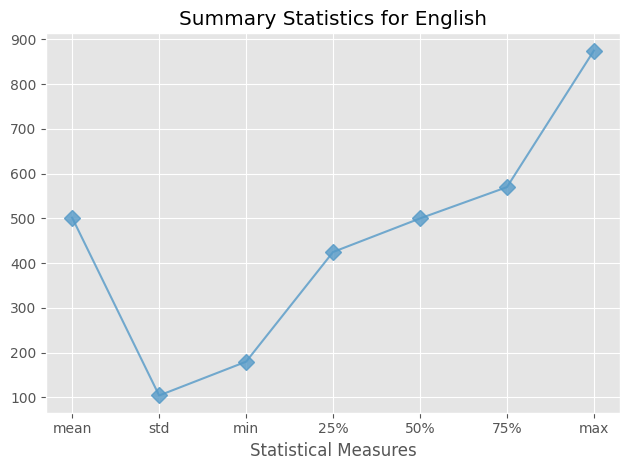

In [71]:
data['English'].describe()[1:].plot(color = colors[1], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for English')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

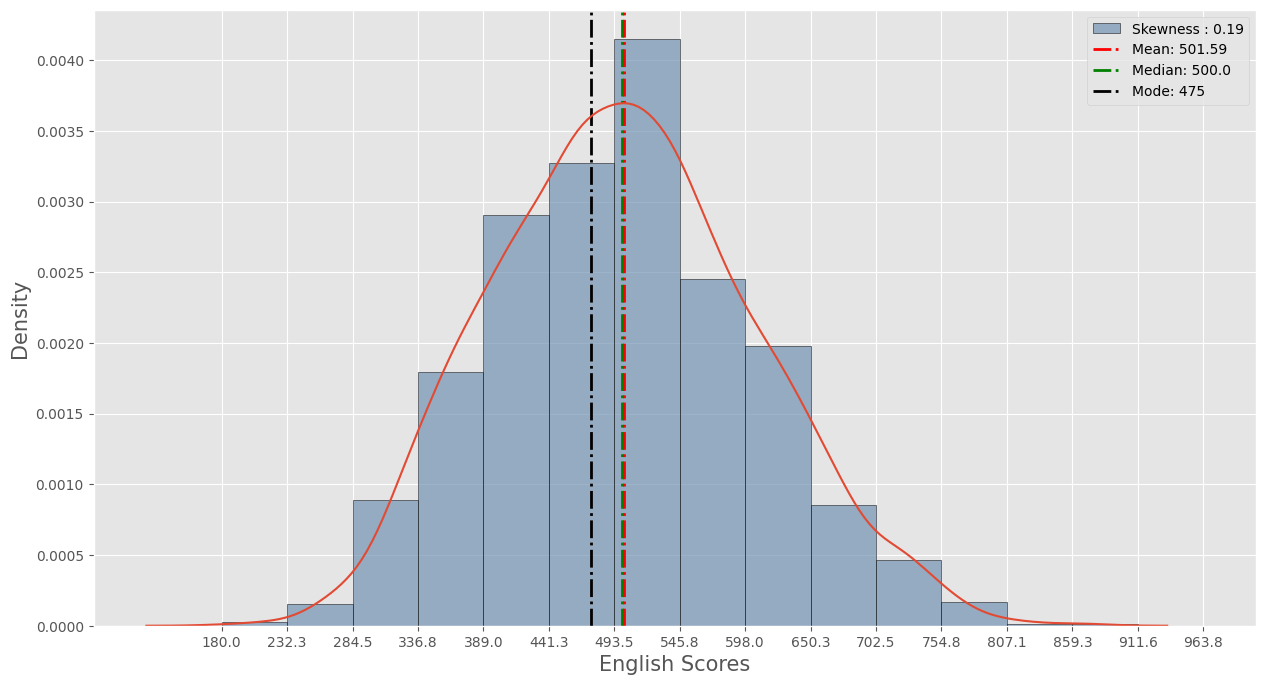

In [72]:
bins = np.arange(data['English'].min(), data['English'].max()+data['English'].std(), 
                 data['English'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(data['English'], ec = 'k',
        color = colors[9], bins = bins,
        label = f"Skewness : {round(data['English'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('English Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(data['English'].mean(), label = f"Mean: {round(data['English'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data['English'].median(), label = f"Median: {round(data['English'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data['English'].mode()[0], label = f"Mode: {round(data['English'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(data['English'])
plt.legend()
plt.show()

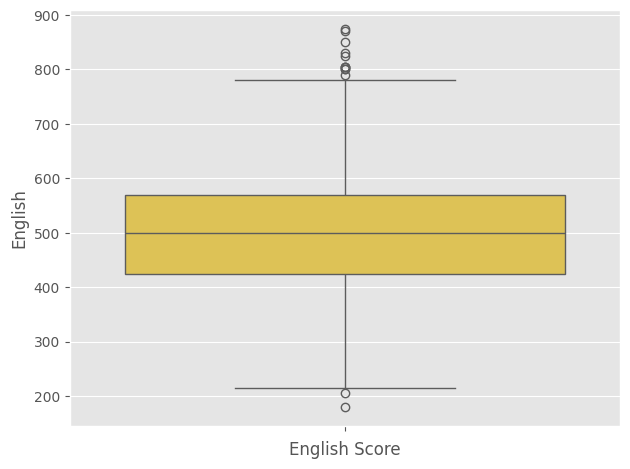

In [73]:
sns.boxplot(data['English'], color = colors[5])
plt.xlabel('English Score')
plt.tight_layout()
plt.show()

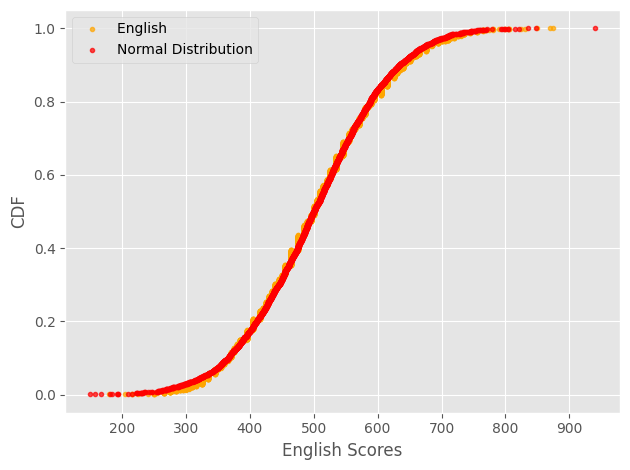

In [74]:
x_eng, y_eng = cdf(data['English'])
x_sample_eng , y_sample_eng = \
cdf(np.random.normal(data['English'].mean(), data['English'].std(), size = len(data['English'])))
plt.plot(x_eng, y_eng, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'English ')
plt.plot(x_sample_eng, y_sample_eng, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('English Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 50% of student's english score was less than 500.
2. Histogram   : Majority of the score were in b/w 389 - 545. Maximum number of students scored 475 and on average score was 502.
3. Box Plot    : The box plot shows that there exist low extreme values as well as high extreme values.
4. CDF    : The data is sufficiently normally distributed.

### 7. Logical

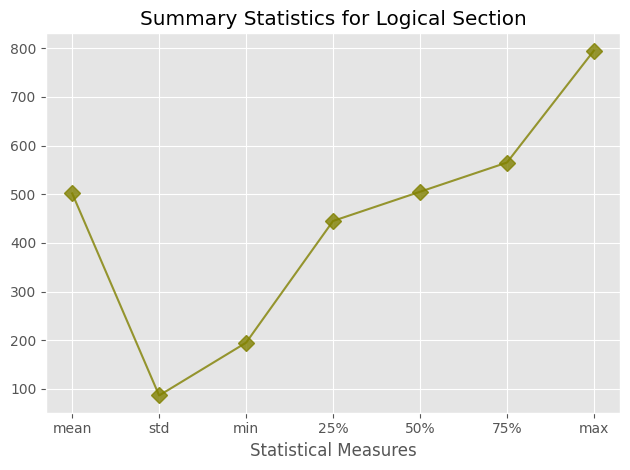

In [75]:
data['Logical'].describe()[1:].plot(color = colors[8], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Logical Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

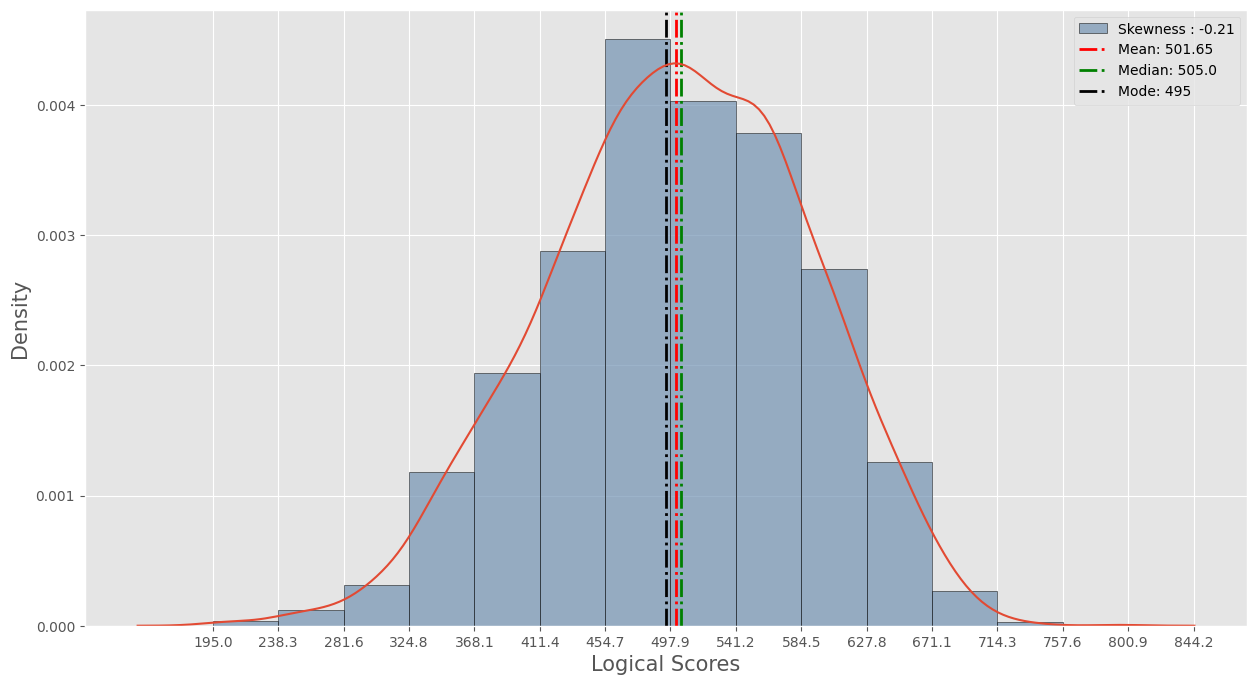

In [76]:
bins = np.arange(data['Logical'].min(), data['Logical'].max()+data['Logical'].std(), 
                 data['Logical'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(data['Logical'], ec = 'k',
        color = colors[9], bins = bins,
        label = f"Skewness : {round(data['Logical'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Logical Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(data['Logical'].mean(), label = f"Mean: {round(data['Logical'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data['Logical'].median(), label = f"Median: {round(data['Logical'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data['Logical'].mode()[0], label = f"Mode: {round(data['Logical'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(data['Logical'])
plt.legend()
plt.show()

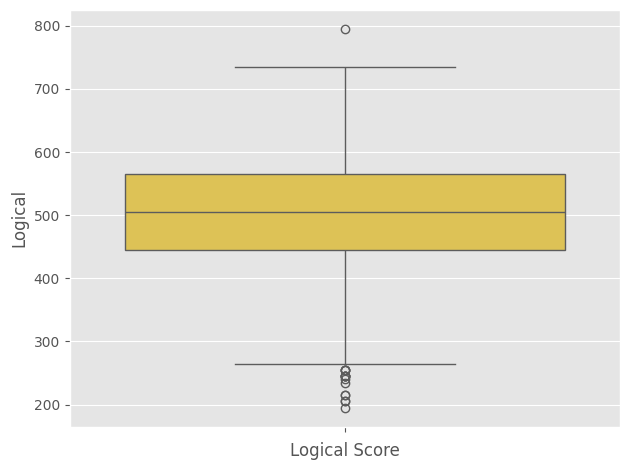

In [77]:
sns.boxplot(data['Logical'], color = colors[5])
plt.xlabel('Logical Score')
plt.tight_layout()
plt.show()

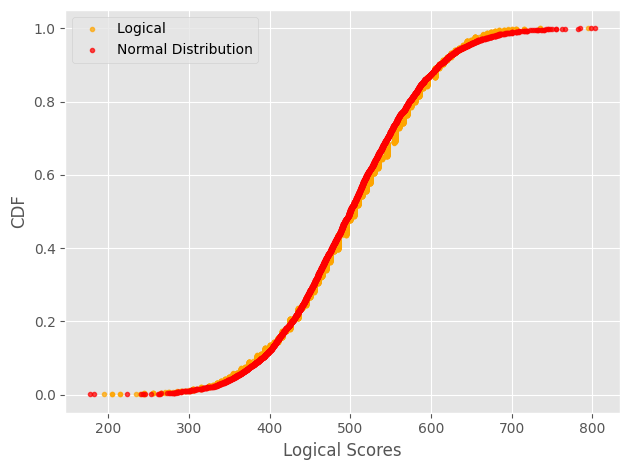

In [78]:
x_log, y_log = cdf(data['Logical'])
x_sample_log , y_sample_log = \
cdf(np.random.normal(data['Logical'].mean(), data['Logical'].std(), size = len(data['Logical'])))
plt.plot(x_log, y_log, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Logical ')
plt.plot(x_sample_log, y_sample_log, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Logical Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 50% of student's logical score was less than 500.
2. Histogram   : Majority of the score were in b/w 454 - 584. Maximum number of students scored 495 and on average score was 502.
3. Box Plot    : The box plot shows that there exist low extreme values but only one high extreme values.
4. CDF    : The data is sufficiently close to normally distributed.

### 8. Quant

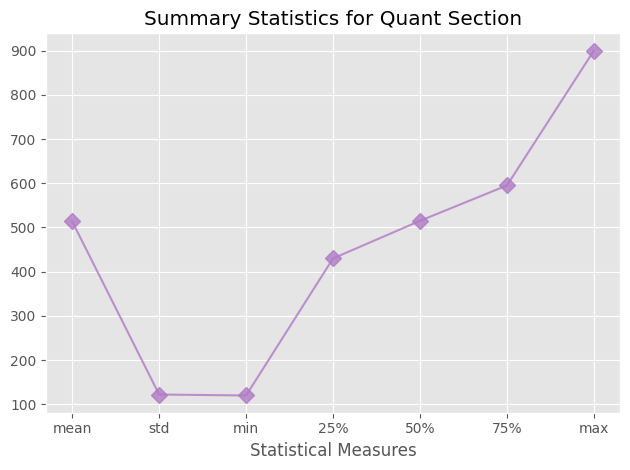

In [79]:
data['Quant'].describe()[1:].plot(color = colors[2], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Quant Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

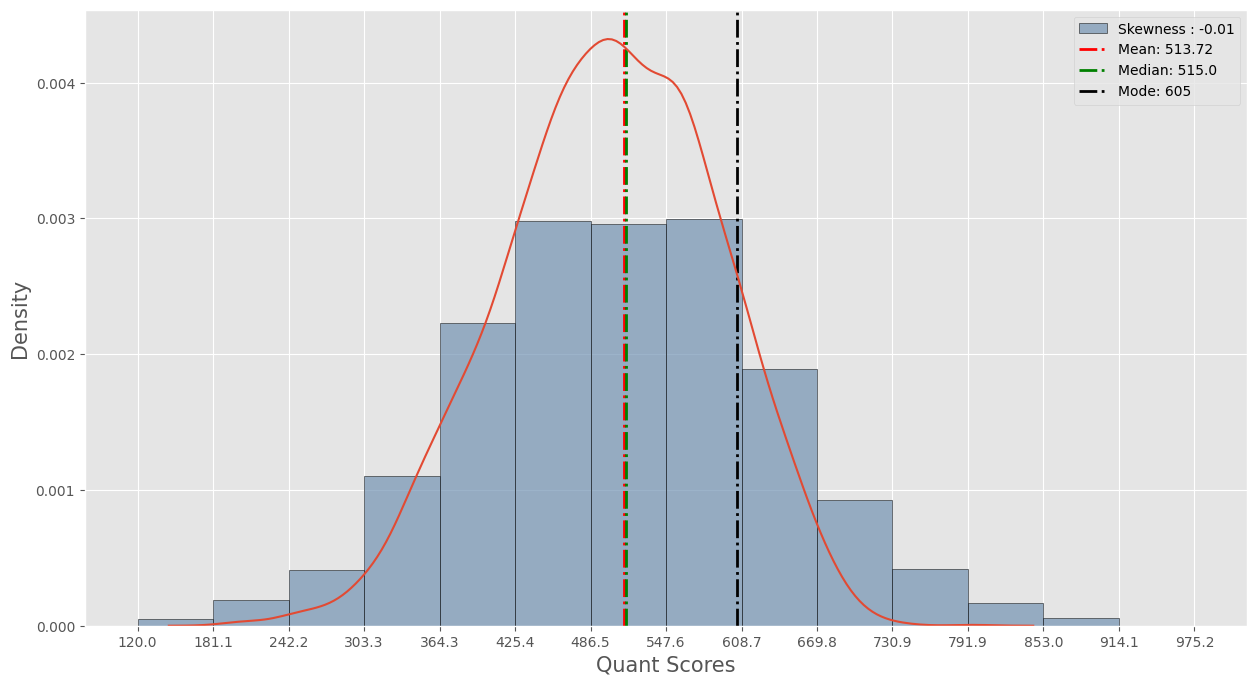

In [80]:
bins = np.arange(data['Quant'].min(), data['Quant'].max()+data['Quant'].std(), 
                 data['Quant'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(data['Quant'], ec = 'k',
        color = colors[9], bins = bins,
        label = f"Skewness : {round(data['Quant'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Quant Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(data['Quant'].mean(), label = f"Mean: {round(data['Quant'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data['Quant'].median(), label = f"Median: {round(data['Quant'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data['Quant'].mode()[0], label = f"Mode: {round(data['Quant'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(data['Logical'])
plt.legend()
plt.show()

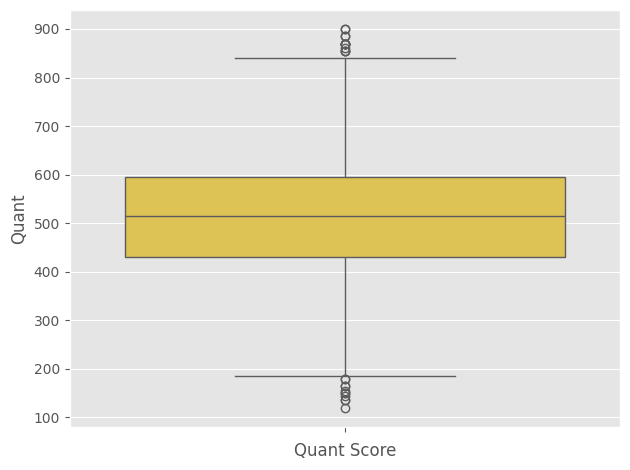

In [81]:
sns.boxplot(data['Quant'], color = colors[5])
plt.xlabel('Quant Score')
plt.tight_layout()
plt.show()

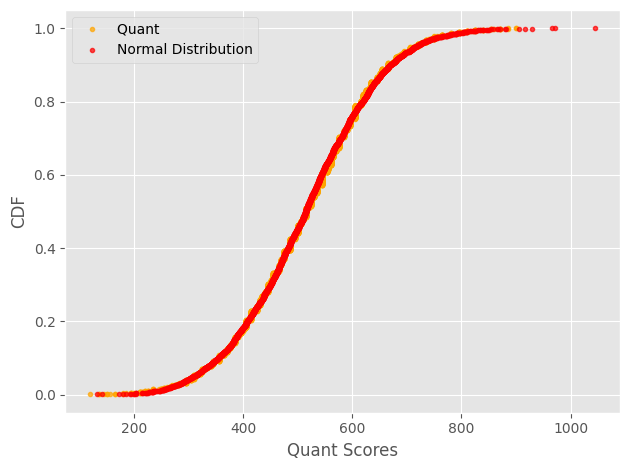

In [82]:
x_q, y_q = cdf(data['Quant'])
x_sample_q , y_sample_q = \
cdf(np.random.normal(data['Quant'].mean(), data['Quant'].std(), size = len(data['Quant'])))
plt.plot(x_q, y_q, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Quant ')
plt.plot(x_sample_q, y_sample_q, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Quant Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 75% of student's logical score was less than 600.
2. Histogram   : Majority of the score were in b/w 425 - 608. Maximum number of students scored 605 and on average score was 513.
3. Box Plot    : The box plot shows that there exist low extreme values as well as high extreme values.
4. CDF    : The data is sufficiently close to normally distributed.

### 9. Computer Programming

In [83]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age(2015)', 'Tenure', 'YearGap'],
      dtype='object')

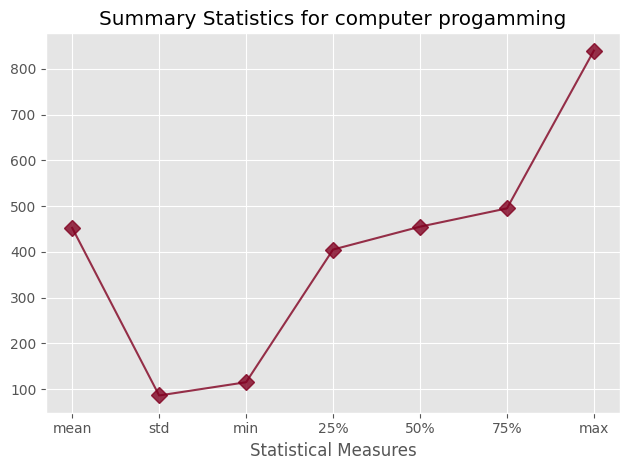

In [84]:
data['ComputerProgramming'].describe()[1:].plot(color = colors[7], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for computer progamming')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

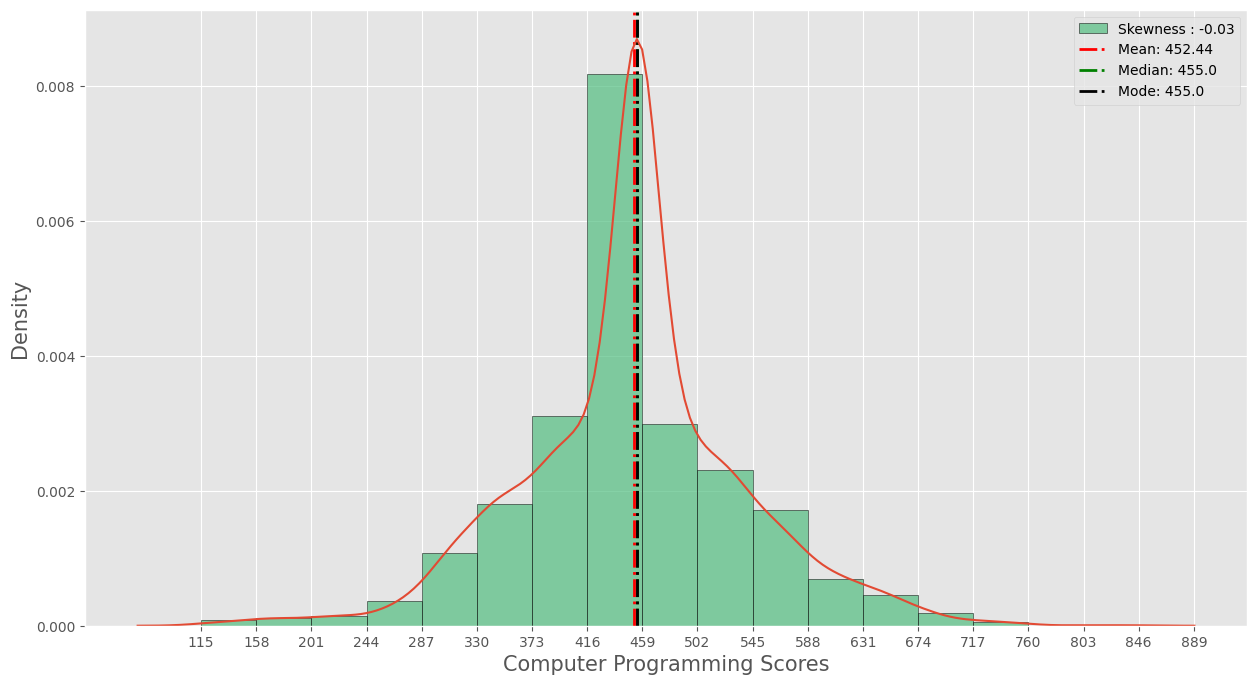

In [85]:
bins = np.arange(data['ComputerProgramming'].min(), data['ComputerProgramming'].max()+data['ComputerProgramming'].std(), 
                 data['ComputerProgramming'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(data['ComputerProgramming'], ec = 'k',
        color = colors[4], bins = bins,
        label = f"Skewness : {round(data['ComputerProgramming'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Computer Programming Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(data['ComputerProgramming'].mean(), label = f"Mean: {round(data['ComputerProgramming'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data['ComputerProgramming'].median(), label = f"Median: {round(data['ComputerProgramming'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data['ComputerProgramming'].mode()[0], label = f"Mode: {round(data['ComputerProgramming'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(data['ComputerProgramming'])
plt.legend()
plt.show()

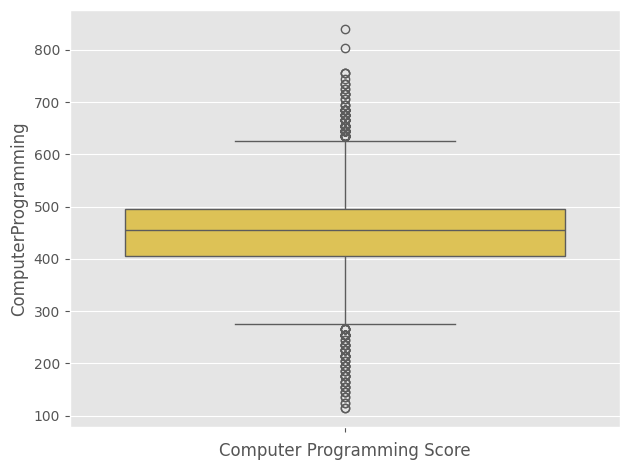

In [86]:
sns.boxplot(data['ComputerProgramming'], color = colors[5])
plt.xlabel('Computer Programming Score')
plt.tight_layout()
plt.show()

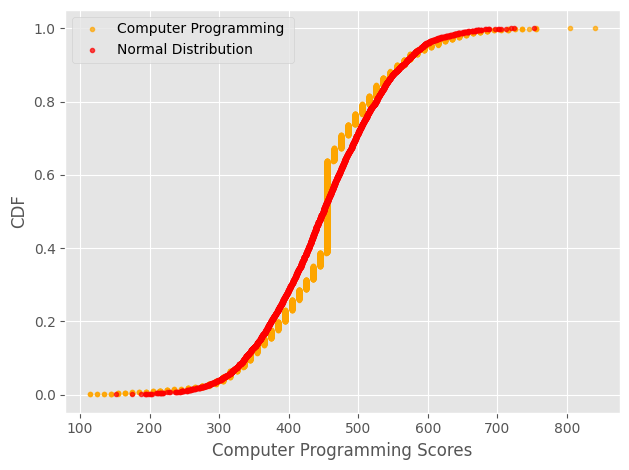

In [87]:
x_cp, y_cp = cdf(data['ComputerProgramming'])
x_sample_cp , y_sample_cp = \
cdf(np.random.normal(data['ComputerProgramming'].mean(), data['ComputerProgramming'].std(), size = \
                     len(data['ComputerProgramming'])))
plt.plot(x_cp, y_cp, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Computer Programming ')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Computer Programming Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 50% of student's score was less than 500.
2. Histogram   : Majority of the score were in b/w 416 - 459. Maximum number of students scored 455 and on average score was 452.
3. Box Plot    : The box plot shows that there exist large number low extreme values as well as high extreme values.
4. CDF    : The data is not normally distributed.

### 10. Electornics and Semiconductors

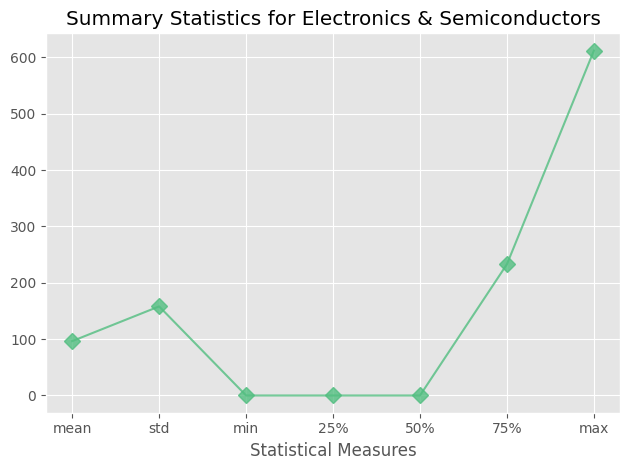

In [88]:
data['ElectronicsAndSemicon'].describe()[1:].plot(color = colors[4], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Electronics & Semiconductors')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

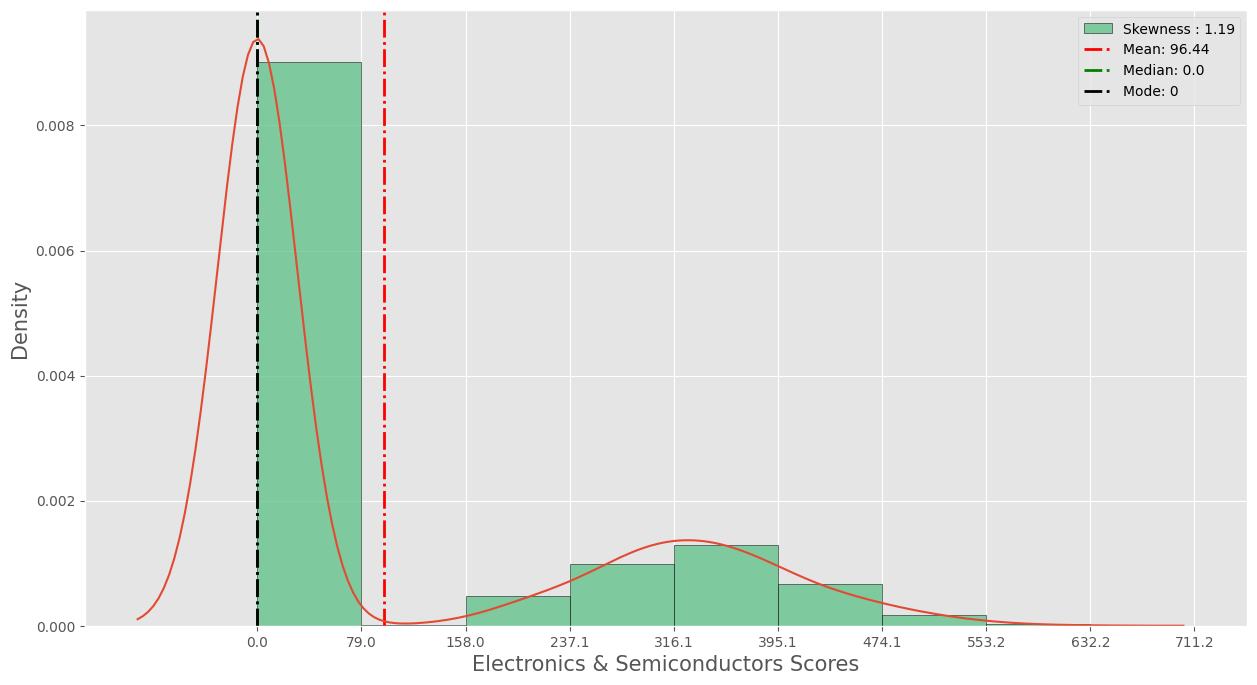

In [89]:
bins = np.arange(data['ElectronicsAndSemicon'].min(), data['ElectronicsAndSemicon'].max()+data['ElectronicsAndSemicon'].std(), 
                 data['ElectronicsAndSemicon'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(data['ElectronicsAndSemicon'], ec = 'k',
        color = colors[4], bins = bins,
        label = f"Skewness : {round(data['ElectronicsAndSemicon'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Electronics & Semiconductors Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(data['ElectronicsAndSemicon'].mean(), label = f"Mean: {round(data['ElectronicsAndSemicon'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data['ElectronicsAndSemicon'].median(), label = f"Median: {round(data['ElectronicsAndSemicon'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data['ElectronicsAndSemicon'].mode()[0], label = f"Mode: {round(data['ElectronicsAndSemicon'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(data['ElectronicsAndSemicon'])
plt.legend()
plt.show()

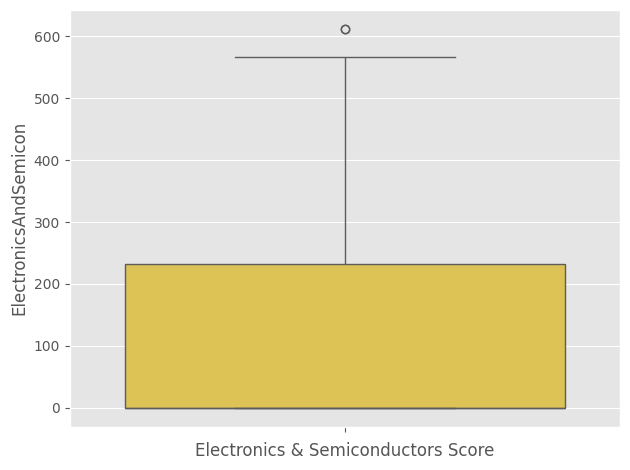

In [90]:
sns.boxplot(data['ElectronicsAndSemicon'], color = colors[5])
plt.xlabel('Electronics & Semiconductors Score')
plt.tight_layout()
plt.show()

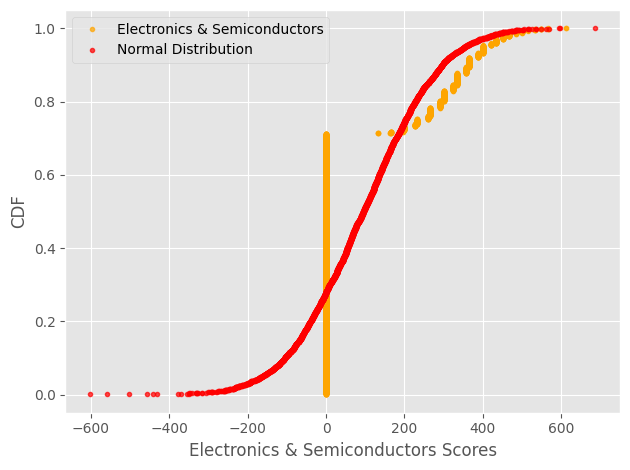

In [91]:
x_cp, y_cp = cdf(data['ElectronicsAndSemicon'])
x_sample_cp , y_sample_cp = \
cdf(np.random.normal(data['ElectronicsAndSemicon'].mean(), data['ElectronicsAndSemicon'].std(), size = \
                     len(data['ElectronicsAndSemicon'])))
plt.plot(x_cp, y_cp, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Electronics & Semiconductors')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Electronics & Semiconductors Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 75% of student's score was less than 250(approx).
2. Histogram   : Majority of the score were in b/w 0 - 79. Maximum number of students scored 0 and on average score was 96.
3. Box Plot    : Minimum score is equal to the median of the data.
4. CDF    : The data is not normally distributed.

### 11.Age

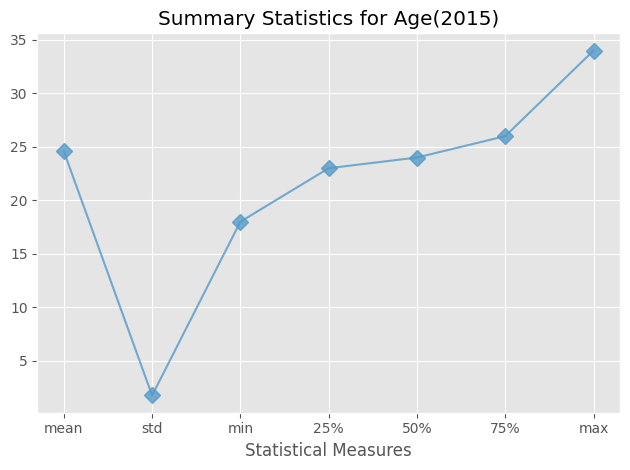

In [92]:
data['Age(2015)'].describe()[1:].plot(color = colors[1], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Age(2015)')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

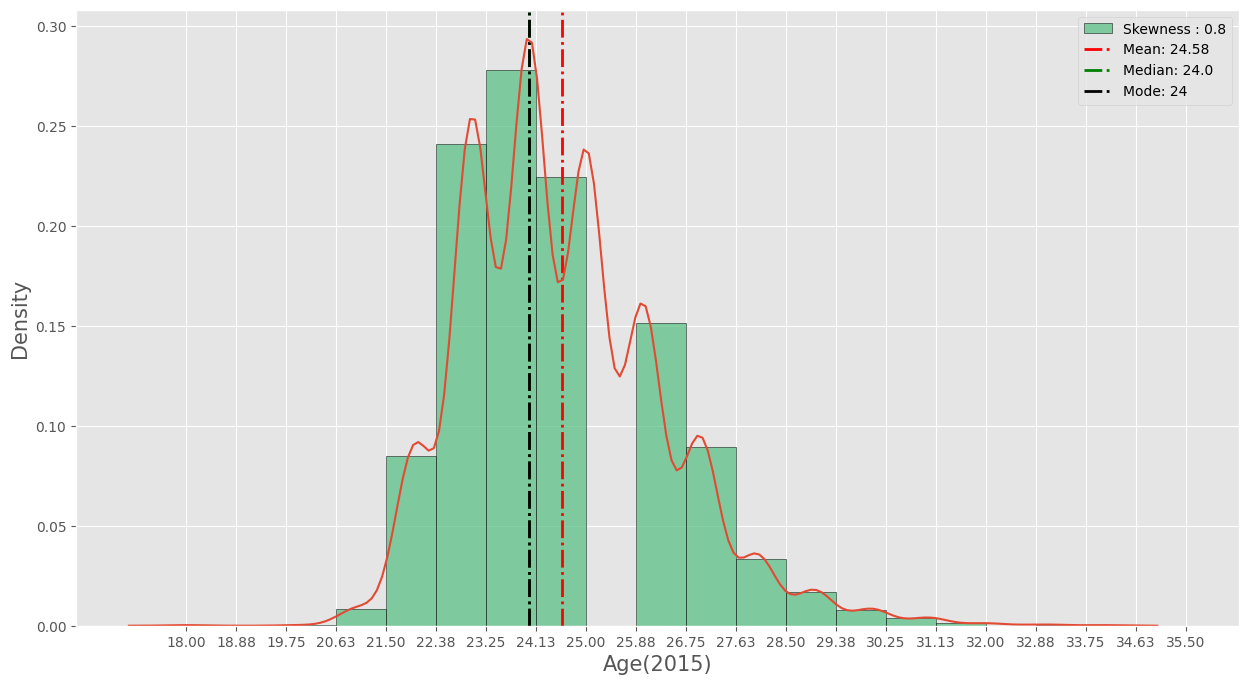

In [93]:
bins = np.arange(data['Age(2015)'].min(), data['Age(2015)'].max()+data['Age(2015)'].std(), 
                 data['Age(2015)'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(data['Age(2015)'], ec = 'k',
        color = colors[4], bins = bins,
        label = f"Skewness : {round(data['Age(2015)'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Age(2015)', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(data['Age(2015)'].mean(), label = f"Mean: {round(data['Age(2015)'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data['Age(2015)'].median(), label = f"Median: {round(data['Age(2015)'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data['Age(2015)'].mode()[0], label = f"Mode: {round(data['Age(2015)'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(data['Age(2015)'])
plt.legend()
plt.show()

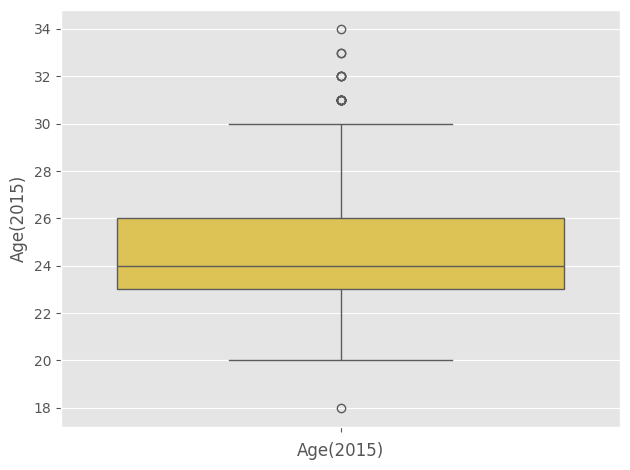

In [94]:
sns.boxplot(data['Age(2015)'], color = colors[5])
plt.xlabel('Age(2015)')
plt.tight_layout()
plt.show()

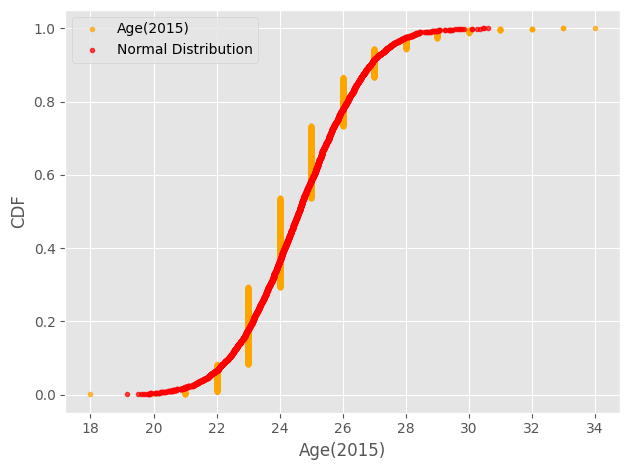

In [95]:
x_cp, y_cp = cdf(data['Age(2015)'])
x_sample_cp , y_sample_cp = \
cdf(np.random.normal(data['Age(2015)'].mean(), data['Age(2015)'].std(), size = \
                     len(data['Age(2015)'])))
plt.plot(x_cp, y_cp, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Age(2015)')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Age(2015)')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
NOTE : Age is calculated b/w DOB and 2015
1. Summary Plot : 75% of student's are less than 26 years old.
2. Histogram   : Majority of the student's age were in b/w 22 - 25. Mean, Median and mode for age happens to be approximately equal i.e 25. 
3. Box Plot    : There exist 4 students with very high age and one with very low relative to other data points.
4. CDF    : The data is not normally distributed.`,

## Categorical Features

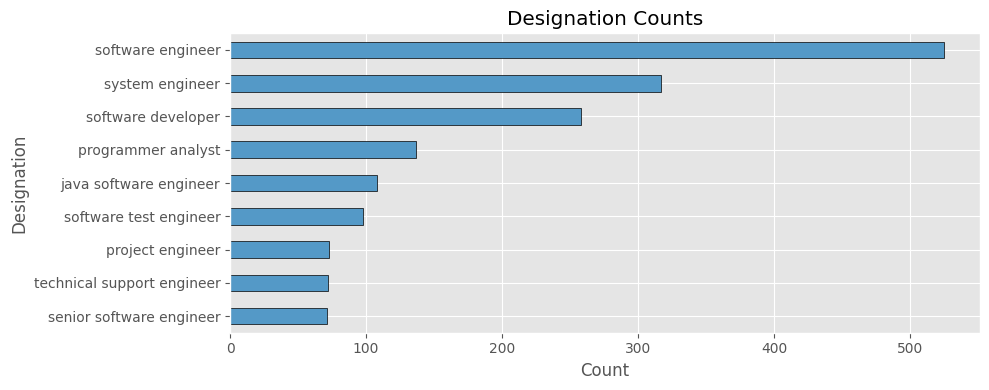

In [96]:
data['Designation'].value_counts()[1:].sort_values(ascending = True).plot(kind = 'barh',
                                                                       color = colors[1],
                                                                       title = 'Designation Counts',
                                                                       figsize = (10,4),
                                                                       ec = 'k')
plt.ylabel('Designation')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

**CONCLUSION** :
Software engineer is the most common desgination of all, followed by system engineer and software developer.
**NOTE** : This graphs the most common designations. There exists *OTHER* category too.

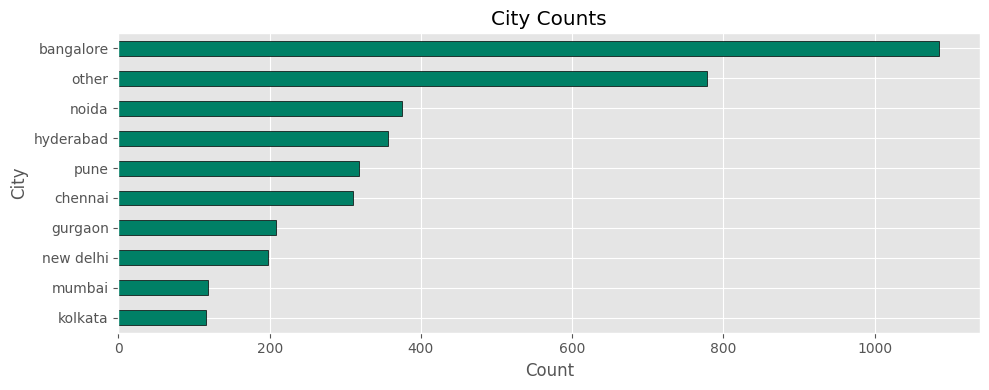

In [97]:
data['JobCity'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                       cmap = 'summer',
                                                                       title = 'City Counts',
                                                                       figsize = (10,4),
                                                               ec = 'k')
plt.ylabel('City')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

**CONCLUSION** : The most favourable city for job placements is bangalore, followed by Noid, Hyderabad and pune. Mumbai and kolkata being least favourable.
    

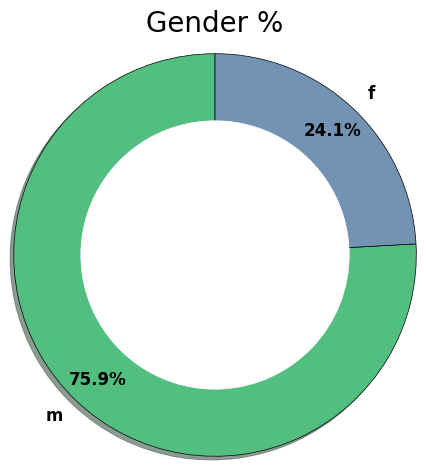

In [98]:
plt.pie(data['Gender'].value_counts().tolist(), labels = data['Gender'].value_counts().index,
       colors = [colors[4],colors[9]],
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':12,'fontweight':'bold'},
       shadow = True,
       #explode = [0.1,0],
       startangle = 90,
       pctdistance = 0.85)
plt.pie(data['Gender'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('Gender %',pad = 40, size = 20)
plt.tight_layout()
plt.show()

**CONCLUSION** : 
The dataset is not balanced in terms of gender as the population of Male is really larger as compared to the female one.

In [99]:
data.head()

Salary        DOJ        DOL               Designation    JobCity Gender   
0   420000 2012-06-01 2015-12-31                     other  bangalore      f  \
1   500000 2013-09-01 2015-12-31                     other      other      m   
2   325000 2014-06-01 2015-12-31           system engineer    chennai      f   
3  1100000 2011-07-01 2015-12-31  senior software engineer    gurgaon      m   
4   200000 2014-03-01 2015-03-01                     other      other      m   

         DOB  10percentage 10board  12graduation  12percentage 12board   
0 1990-02-19          84.3   other          2007          95.8   other  \
1 1989-10-04          85.4    cbse          2007          85.0    cbse   
2 1992-08-03          85.0    cbse          2010          68.2    cbse   
3 1989-12-05          85.6    cbse          2007          83.6    cbse   
4 1991-02-27          78.0    cbse          2008          76.8    cbse   

  CollegeTier       Degree                    Specialization  collegeGPA   
0           2  B.Tech/B.E.    computer science & engineering       78.00  \
1           2  B.Tech/B.E.  electronics & telecommunications       70.06   
2           2  B.Tech/B.E.            information technology       70.00   
3           1  B.Tech/B.E.    computer science & engineering       74.64   
4           2  B.Tech/B.E.  electronics & telecommunications       73.90   

  CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant   
0               0  andhra pradesh          2011.0      515      585    525  \
1               0  madhya pradesh          2012.0      695      610    780   
2               0   uttar pradesh          2014.0      615      545    370   
3               1           other          2011.0      635      585    625   
4               0   uttar pradesh          2012.0      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience   
0  0.635979                445.0                      0                0  \
1  0.960603                455.0                    466                0   
2  0.450877                395.0                      0                0   
3  0.974396                615.0                      0                0   
4  0.124502                455.0                    233                0   

   conscientiousness  agreeableness  extraversion  nueroticism   
0             0.9737         0.8128        0.5269      1.35490  \
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Age(2015)  Tenure  YearGap  
0                -0.4455         25    1308      1.0  
1                 0.8637         26     851      1.0  
2                 0.6721         23     578      0.0  
3                -0.9194         26    1644      0.0  
4                -0.1295         24     365      2.0

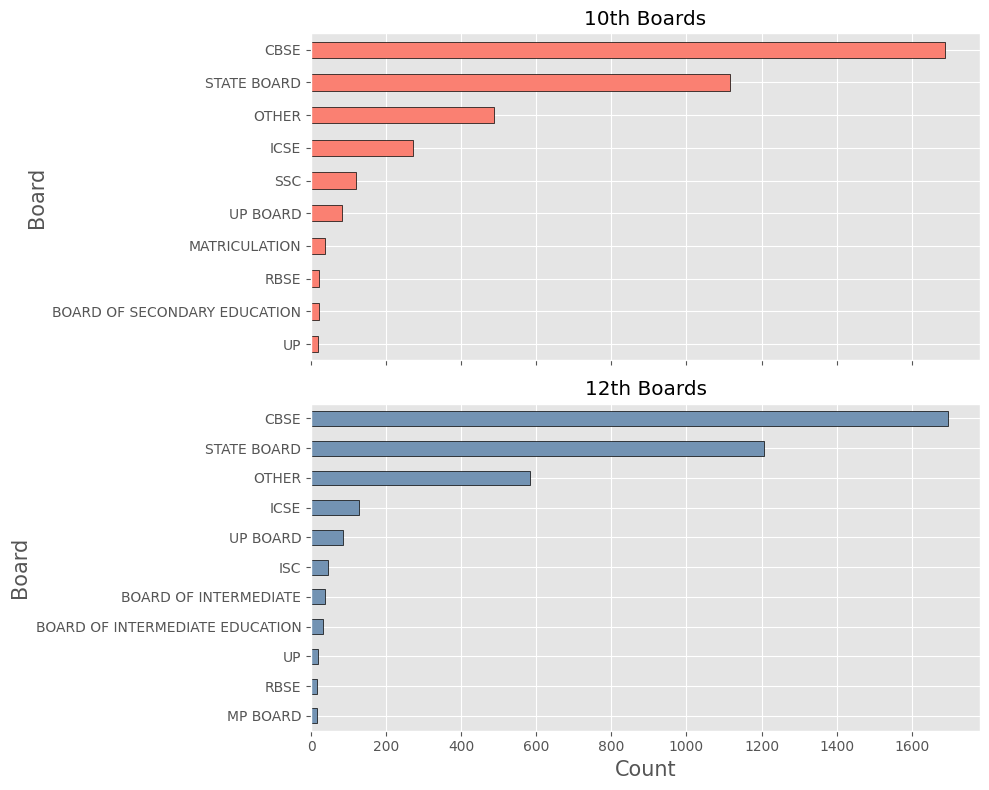

In [100]:
fig, ax = plt.subplots(2, 1, figsize = (10,8), sharex = True)
data['10board'].str.upper().value_counts().sort_values(ascending = True).plot(kind = 'barh', ax = ax[0],
                                                                           color = colors[6],
                                                                           ec = 'k',
                                                                           title = '10th Boards')
ax[0].set_ylabel('Board', size = 15)

data['12board'].str.upper().value_counts().sort_values(ascending = True).plot(kind = 'barh', ax = ax[1],
                                                                           color = colors[9],
                                                                           ec = 'k',
                                                                           title = '12th Boards')
ax[1].set_ylabel('Board', size = 15)
ax[1].set_xlabel('Count', size = 15)
plt.tight_layout()
plt.show()

**CONCLUSION** : 
    CBSE is the most common school board for both 12th and 10th.

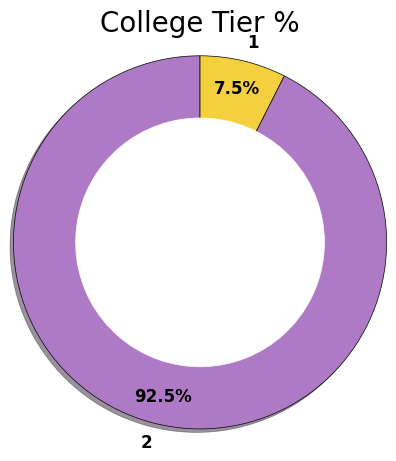

In [101]:
plt.pie(data['CollegeTier'].value_counts().tolist(), labels = data['CollegeTier'].value_counts().index,
       colors = [colors[2],colors[5]],
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':12,'fontweight':'bold'},
       shadow = True,
       #explode = [0.1,0],
       startangle = 90,
       pctdistance = 0.85)
plt.pie(data['CollegeTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 40, size = 20)
plt.margins(0.02)
plt.tight_layout()
plt.show()

**CONCLUSION** : Almost all the college belongs to Tier 1 only with a % of 92.5

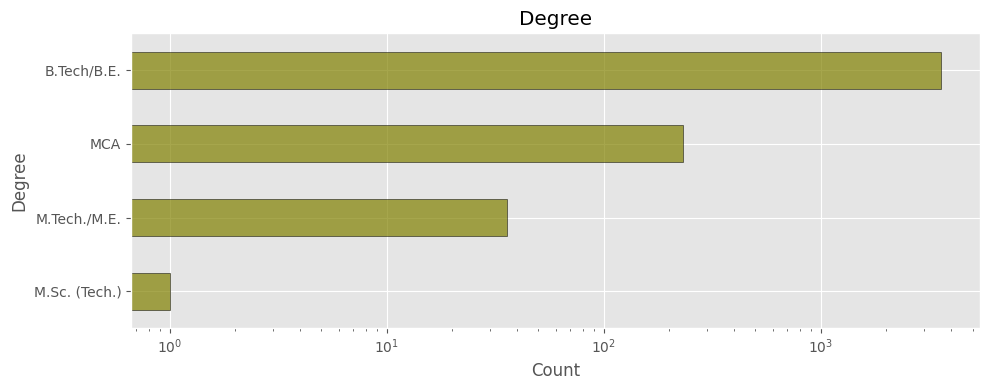

In [102]:
data['Degree'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                       color = colors[8],
                                                                       title = 'Degree',
                                                                       figsize = (10,4),
                                                                       ec = 'k',
                                                              alpha = 0.7)
plt.ylabel('Degree')
plt.xlabel('Count')
plt.xscale('log')
plt.tight_layout()
plt.show()

**CONCLUSION** :
    Most of the students have done their graduation in B.Tech and there are very less students from M.Sc(Tech)

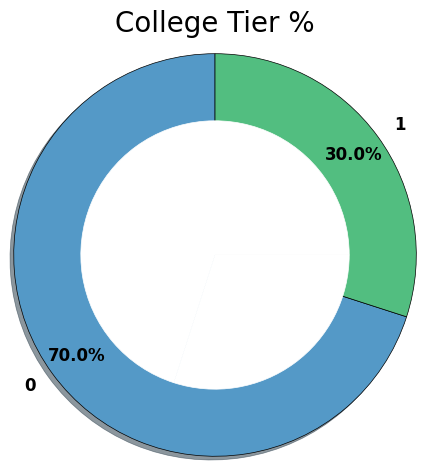

In [103]:
plt.pie(data['CollegeCityTier'].value_counts().tolist(), labels = data['CollegeCityTier'].value_counts().index,
       colors = [colors[1],colors[4]],
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':12,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.85)
plt.pie(data['CollegeCityTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 40, size = 20)
plt.margins(0.02)
plt.tight_layout()
plt.show()

**CONCLUSION** : Majority of the colleges are form Tier 0 city.

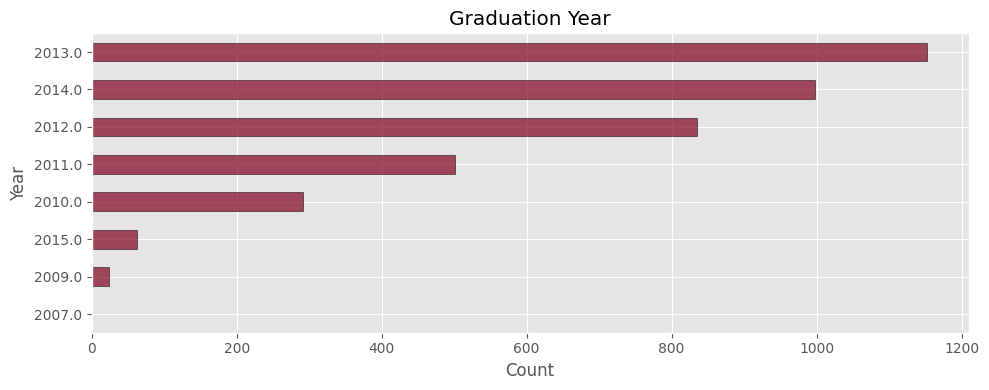

In [104]:
data['GraduationYear'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                       color = colors[7],
                                                                       title = 'Graduation Year',
                                                                       figsize = (10,4),
                                                                       ec = 'k',
                                                              alpha = 0.7)
plt.ylabel('Year')
plt.xlabel('Count')
#plt.xscale('log')
plt.tight_layout()
plt.show()

**CONCLUSION** : Maximum number of students were graduated in 2013, followed by the year 2014 and 2012.

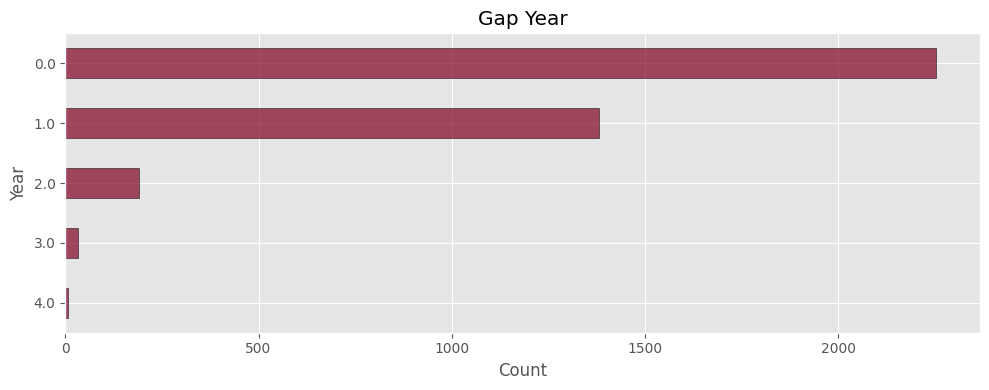

In [105]:
data['YearGap'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                       color = colors[7],
                                                                       title = 'Gap Year',
                                                                       figsize = (10,4),
                                                                       ec = 'k',
                                                              alpha = 0.7)
plt.ylabel('Year')
plt.xlabel('Count')
#plt.xscale('log')
plt.tight_layout()
plt.show()

**CONCLUSION** : Maximum number of students have 0 gap years i.e the students got placed in the same year they got graduated. Some students do have 1 year gap.

## Outliers Removal

In [106]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [107]:
columns = ['Salary','10percentage','12percentage','English',
          'Logical','Quant','Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age(2015)', 'Tenure', 'YearGap']
df_copy = data.copy()

In [108]:
for cols in columns:
    #exctracting upper fence and lower fence
    lowerbound,upperbound = outlier_treatment(df_copy[cols])

    #dropping the outlier
    df_copy = df_copy.drop(df_copy[(df_copy[cols] < lowerbound) | (df_copy[cols] > upperbound)].index)

In [109]:
print(f'Number of observations with outliers : {data.shape[0]}')
print(f'Number of observations without outliers : {df_copy.shape[0]}')

Number of observations with outliers : 3864
Number of observations without outliers : 2463


## Bivariate Analysis

C:\Users\Mahima Churi\AppData\Local\Temp\ipykernel_9268\1680759891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Salary', y = 'Designation',


C:\Users\Mahima Churi\AppData\Local\Temp\ipykernel_9268\1680759891.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Salary', y = 'Designation',


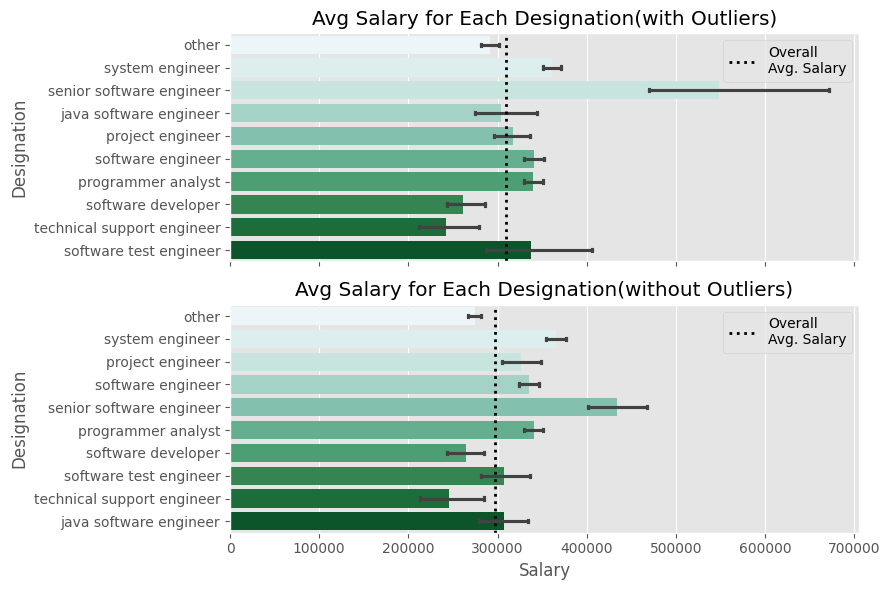

In [110]:
fig, ax = plt.subplots(2, 1, figsize = (9,6), sharex = True)
sns.barplot(x = 'Salary', y = 'Designation',
           data = data,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(data['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary for Each Designation(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'Salary', y = 'Designation',
           data = df_copy,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(df_copy['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('Avg Salary for Each Designation(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')



plt.tight_layout()
plt.show()

**CONCLUSION** : 
Bar plot shows the maximum salary for each designation. Senior Software Engineer has the highest salary but they also has the maximum standard deviation in their salary. There are only two designations namely, software developer and technical support engineer who has salary lower than average salary.

C:\Users\Mahima Churi\AppData\Local\Temp\ipykernel_9268\1100271902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Salary', y = 'Gender',


C:\Users\Mahima Churi\AppData\Local\Temp\ipykernel_9268\1100271902.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Salary', y = 'Gender',


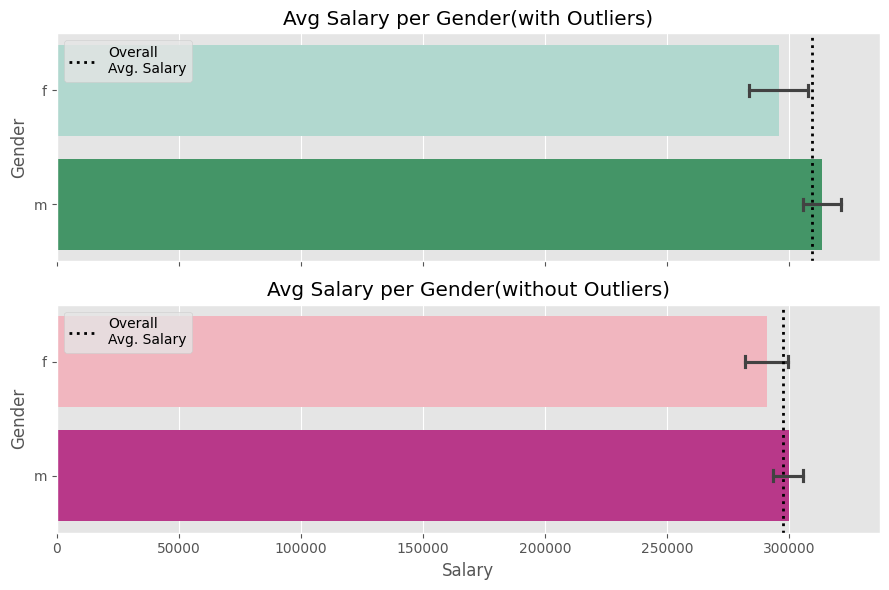

In [111]:
fig, ax = plt.subplots(2, 1, figsize = (9,6), sharex = True)
sns.barplot(x = 'Salary', y = 'Gender',
           data = data,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(data['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary per Gender(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'Salary', y = 'Gender',
           data = df_copy,
           palette = 'RdPu',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(df_copy['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('Avg Salary per Gender(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')



plt.tight_layout()
plt.show()

**CONCLUSION**: The average salary for both male and female is approximately equal and it implies that there was no gender bias in terms of salary. 

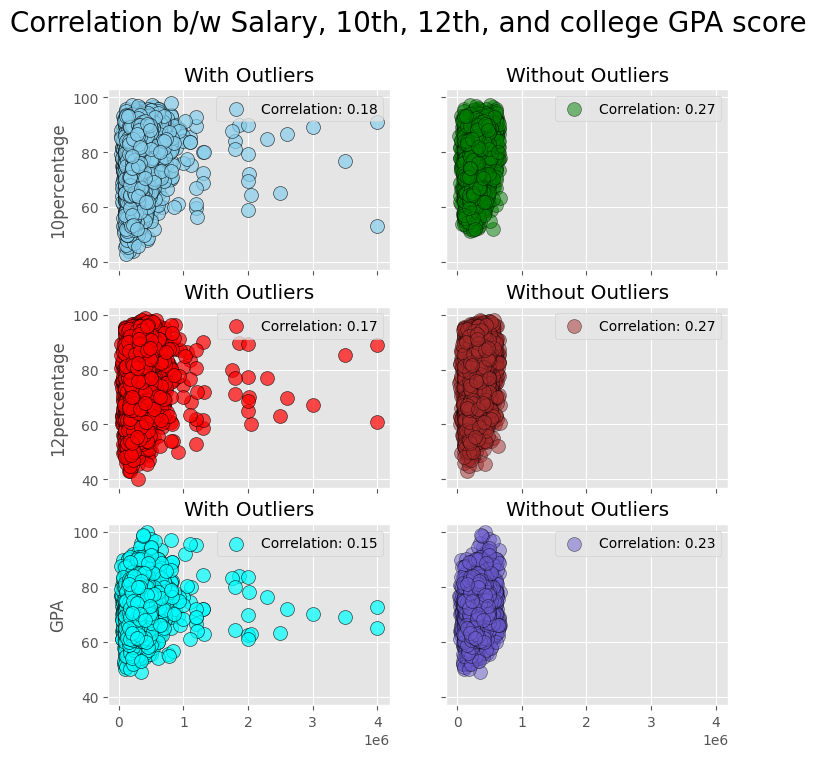

In [112]:
fig, ax = plt.subplots(3, 2, figsize = (8,8), sharex = True, sharey = True)

#scatter plot for Salary and 10th score
ax[0,0].scatter(data['Salary'],data['10percentage'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(data[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('10percentage')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(df_copy['Salary'],df_copy['10percentage'],
               ec = 'k',
               color = 'green',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].legend()


#scatter plot for Salary and 12th score.
ax[1,0].scatter(data['Salary'],data['12percentage'],
               ec = 'k',
               color = 'red',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(data[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('12percentage')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(df_copy['Salary'],df_copy['12percentage'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()


#scatter plot for Salary and college GPA score.
ax[2,0].scatter(data['Salary'],data['collegeGPA'],
               ec = 'k',
               color = 'cyan',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(data[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('GPA')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(df_copy['Salary'],df_copy['collegeGPA'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()



fig.suptitle('Correlation b/w Salary, 10th, 12th, and college GPA score', size = 20)
plt.show()

**CONCLUSION** : There does not exist any correaltion b/w Salary, 10th, 12th and GPA scores.

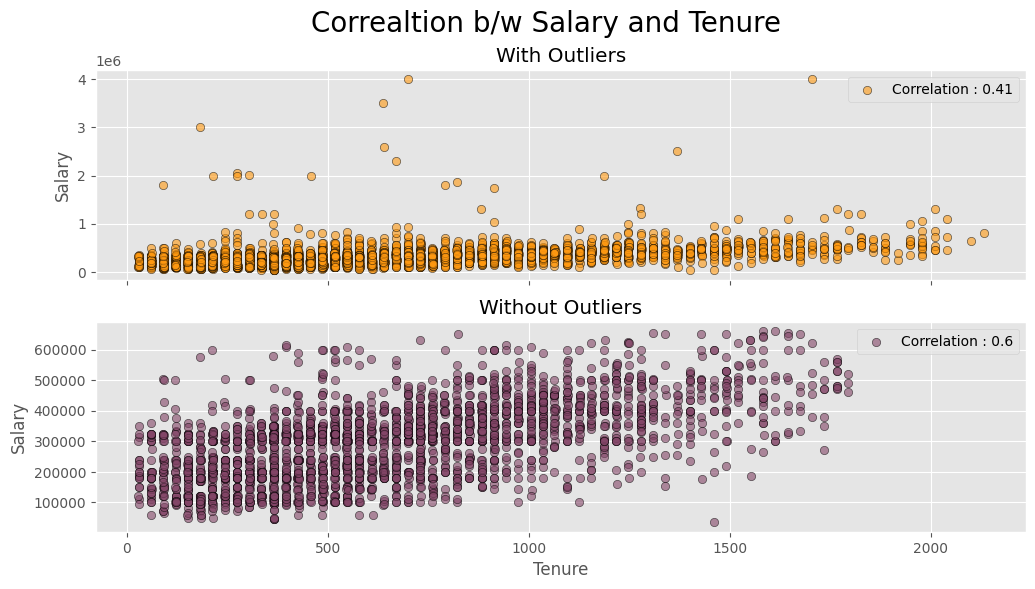

In [113]:
#correaltion b/w Salary, age and Tenure.
fig, ax = plt.subplots(2, 1, figsize = (12,6), sharex  = True)
ax[0].scatter(data['Tenure'], data['Salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(data[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers')


ax[1].scatter(df_copy['Tenure'], df_copy['Salary'],
             ec = 'k',
             color = '#834567',
             alpha = 0.6,
             label = f"Correlation : {round(df_copy[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers')
ax[1].set_xlabel('Tenure')

fig.suptitle('Correaltion b/w Salary and Tenure', size = 20)

plt.show()

**CONCLUSION** : After removing the outliers, it is evident that salary gets about 50% of increment as tenure increase as there is a positive correlation of 0.60.

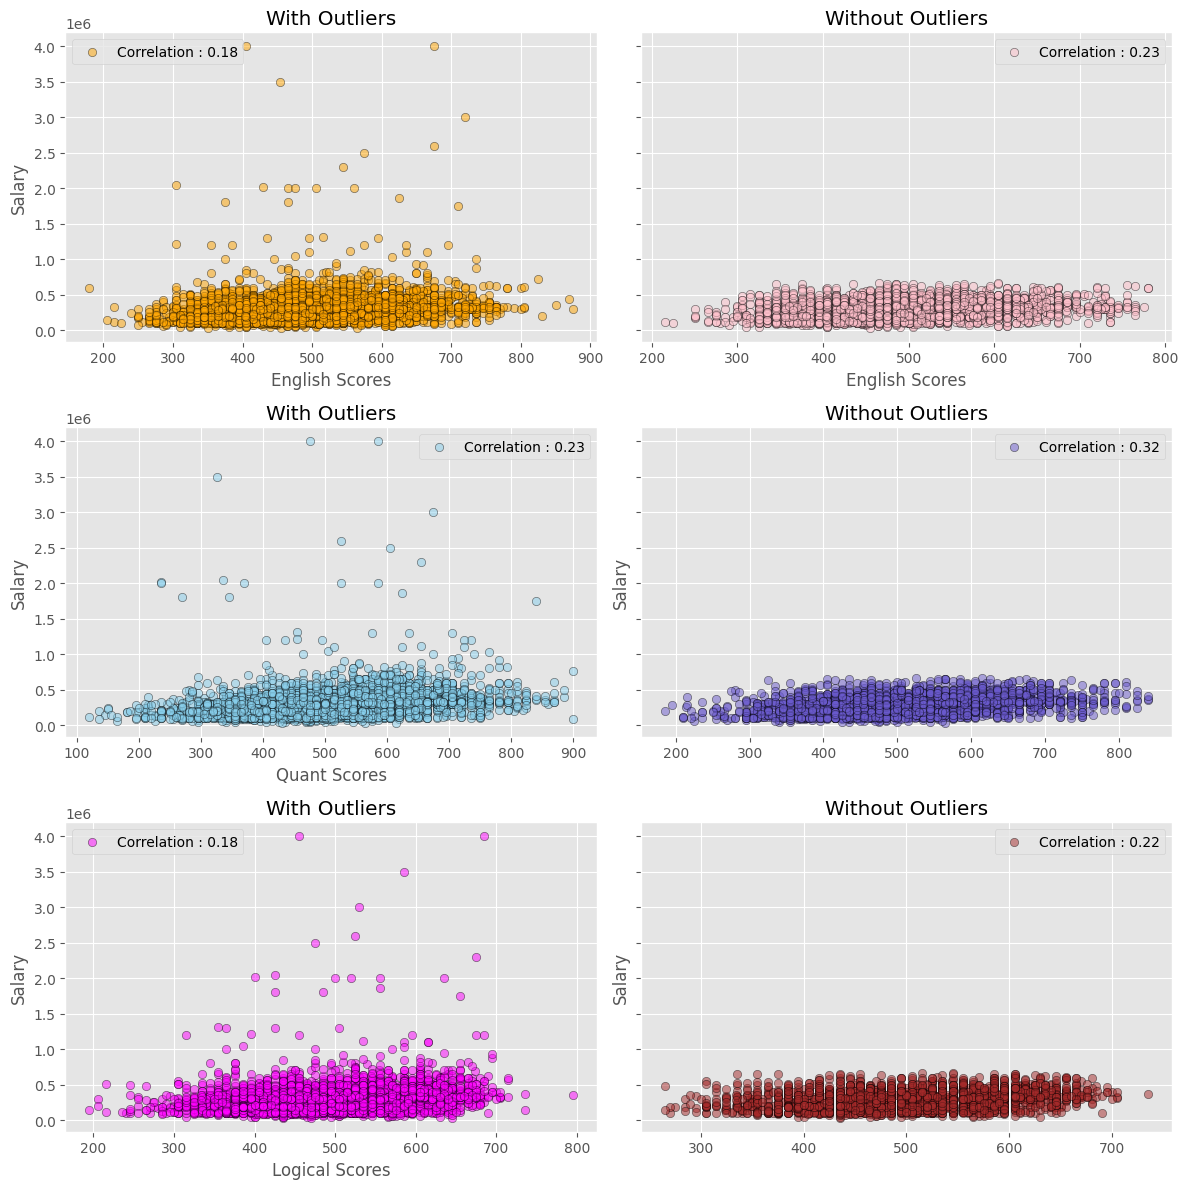

In [114]:
fig, ax = plt.subplots(3, 2, figsize = (12,12), sharey = True)
ax[0,0].scatter(data['English'],data['Salary'],
               ec = 'k',
               color = 'orange',
               alpha = 0.5,
               label = f"Correlation : {round(data[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('Salary')
ax[0,0].set_xlabel('English Scores')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(df_copy['English'],df_copy['Salary'],
               ec = 'k',
               color = 'pink',
               alpha = 0.5,
               label = f"Correlation : {round(df_copy[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].set_xlabel('English Scores')
ax[0,1].legend()




ax[1,0].scatter(data['Quant'],data['Salary'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.5,
               label = f"Correlation : {round(data[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('Salary')
ax[1,0].set_xlabel('Quant Scores')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(df_copy['Quant'],df_copy['Salary'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               label = f"Correlation : {round(df_copy[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_ylabel('Salary')
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()



ax[2,0].scatter(data['Logical'],data['Salary'],
               ec = 'k',
               color = 'magenta',
               alpha = 0.5,
               label = f"Correlation : {round(data[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('Salary')
ax[2,0].set_xlabel('Logical Scores')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(df_copy['Logical'],df_copy['Salary'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               label = f"Correlation : {round(df_copy[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_ylabel('Salary')
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()


plt.tight_layout()
plt.show()

**CONCLUSION** : The scatters plots gives adequate evidence that salary is not effected by any of the above scores.

<Axes: ylabel='Specialization'>

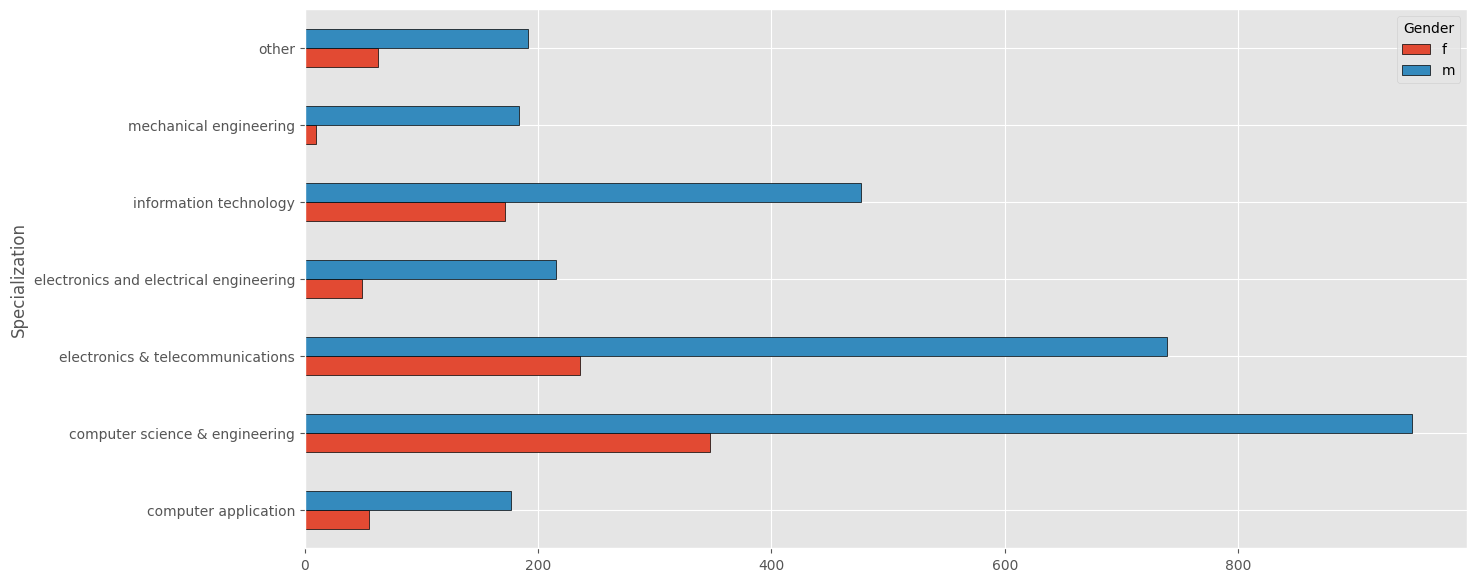

In [115]:
pd.crosstab(data['Gender'],data['Specialization']).T.plot(kind = 'barh',
                                                     ec = 'k',
                                                     figsize = (15,7))

**CONCLUSION** : There are almost males 2 times as of females in every specialization. Also, there are very less number of females who opted for mechanical and electronics.

In [116]:
df_copy.head()

Salary        DOJ        DOL       Designation    JobCity Gender   
0  420000 2012-06-01 2015-12-31             other  bangalore      f  \
1  500000 2013-09-01 2015-12-31             other      other      m   
2  325000 2014-06-01 2015-12-31   system engineer    chennai      f   
4  200000 2014-03-01 2015-03-01             other      other      m   
9  230000 2014-07-01 2015-12-31  project engineer    kolkata      m   

         DOB  10percentage 10board  12graduation  12percentage 12board   
0 1990-02-19          84.3   other          2007          95.8   other  \
1 1989-10-04          85.4    cbse          2007          85.0    cbse   
2 1992-08-03          85.0    cbse          2010          68.2    cbse   
4 1991-02-27          78.0    cbse          2008          76.8    cbse   
9 1993-06-13          77.0    cbse          2010          72.2    cbse   

  CollegeTier       Degree                    Specialization  collegeGPA   
0           2  B.Tech/B.E.    computer science & engineering       78.00  \
1           2  B.Tech/B.E.  electronics & telecommunications       70.06   
2           2  B.Tech/B.E.            information technology       70.00   
4           2  B.Tech/B.E.  electronics & telecommunications       73.90   
9           2  B.Tech/B.E.  electronics & telecommunications       78.00   

  CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant   
0               0  andhra pradesh          2011.0      515      585    525  \
1               0  madhya pradesh          2012.0      695      610    780   
2               0   uttar pradesh          2014.0      615      545    370   
4               0   uttar pradesh          2012.0      545      625    465   
9               1     west bengal          2014.0      605      565    545   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience   
0  0.635979                445.0                      0                0  \
1  0.960603                455.0                    466                0   
2  0.450877                395.0                      0                0   
4  0.124502                455.0                    233                0   
9  0.493596                385.0                    324                0   

   conscientiousness  agreeableness  extraversion  nueroticism   
0             0.9737         0.8128        0.5269      1.35490  \
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
4            -0.8810        -0.2793       -1.0697      0.09163   
9            -1.3080         0.5454       -0.9122      0.90660   

   openess_to_experience  Age(2015)  Tenure  YearGap  
0                -0.4455         25    1308      1.0  
1                 0.8637         26     851      1.0  
2                 0.6721         23     578      0.0  
4                -0.1295         24     365      2.0  
9                 0.0973         22     548      0.0

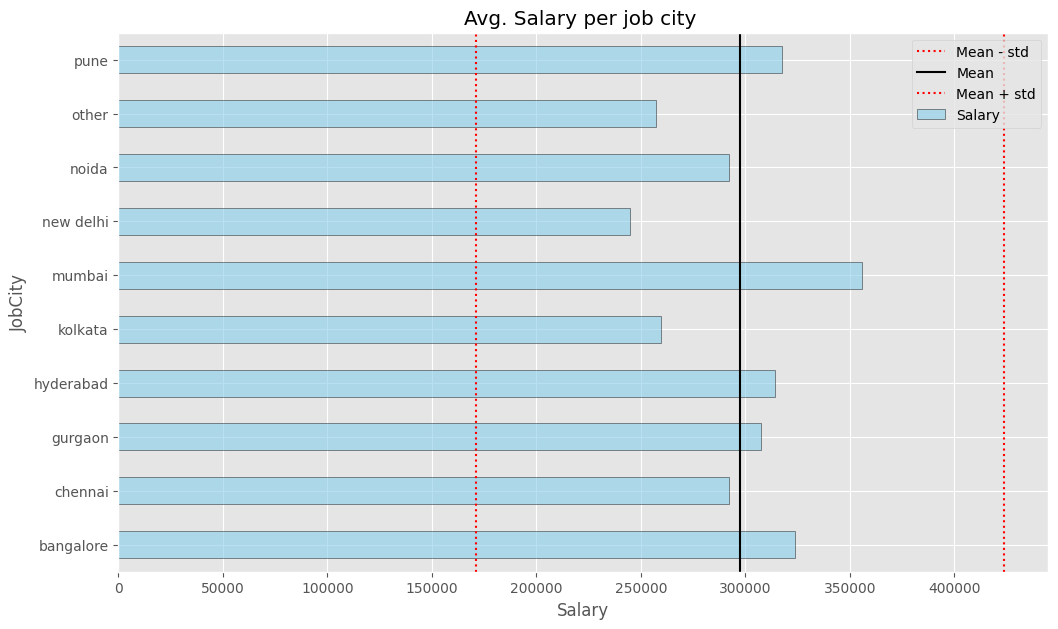

In [117]:
pd.pivot_table(index = 'JobCity',
              values = 'Salary',
              data = df_copy).plot(kind = 'barh',
                             ec = 'k',
                            alpha = 0.6,
                                  color = 'skyblue',
                                  title = 'Avg. Salary per job city ',
                                  figsize = (12,7))
plt.xlabel('Salary')
plt.axvline(df_copy['Salary'].mean() - df_copy['Salary'].std(), 
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df_copy['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df_copy['Salary'].mean() + df_copy['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

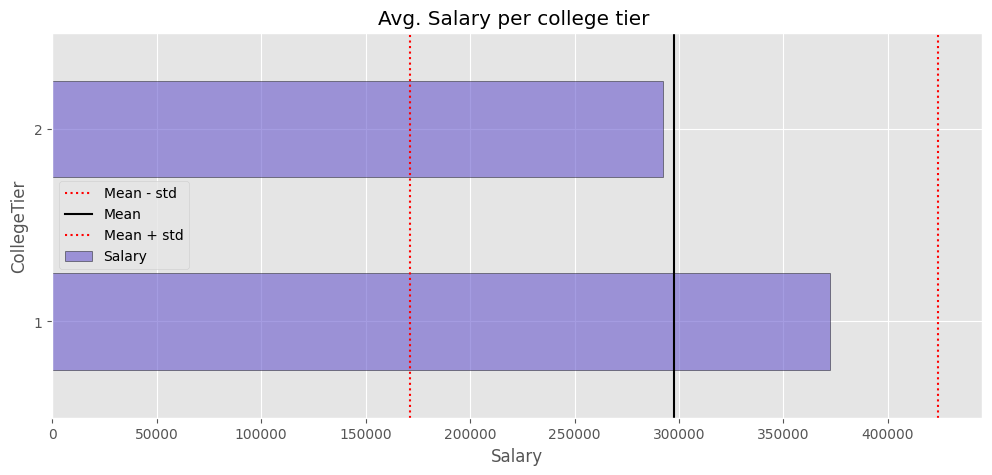

In [118]:
pd.pivot_table(index = 'CollegeTier',
              values = 'Salary',
              data = df_copy).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'slateblue',
                                  title = 'Avg. Salary per college tier ',
                                  figsize = (12,5),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df_copy['Salary'].mean() - df_copy['Salary'].std(), 
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df_copy['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df_copy['Salary'].mean() + df_copy['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

**CONCLUSION** : College within tier one offers high salary as compared to the colleges in tier 2. Colleges in tier 2 offers below overall average salary.

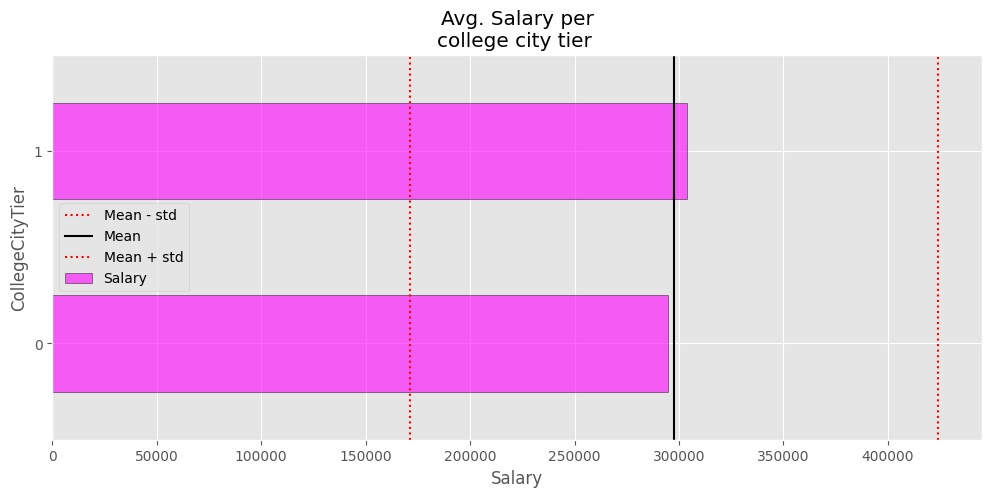

In [119]:
pd.pivot_table(index = 'CollegeCityTier',
              values = 'Salary',
              data = df_copy).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'magenta',
                                  title = 'Avg. Salary per\ncollege city tier ',
                                  figsize = (12,5),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df_copy['Salary'].mean() - df_copy['Salary'].std(), 
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df_copy['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df_copy['Salary'].mean() + df_copy['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

**CONCLUSION** : Cities under tier 1 and 2 offers almost same salaries to students.

## Trivariate Analysis

In [120]:
df_copy.head()

Salary        DOJ        DOL       Designation    JobCity Gender   
0  420000 2012-06-01 2015-12-31             other  bangalore      f  \
1  500000 2013-09-01 2015-12-31             other      other      m   
2  325000 2014-06-01 2015-12-31   system engineer    chennai      f   
4  200000 2014-03-01 2015-03-01             other      other      m   
9  230000 2014-07-01 2015-12-31  project engineer    kolkata      m   

         DOB  10percentage 10board  12graduation  12percentage 12board   
0 1990-02-19          84.3   other          2007          95.8   other  \
1 1989-10-04          85.4    cbse          2007          85.0    cbse   
2 1992-08-03          85.0    cbse          2010          68.2    cbse   
4 1991-02-27          78.0    cbse          2008          76.8    cbse   
9 1993-06-13          77.0    cbse          2010          72.2    cbse   

  CollegeTier       Degree                    Specialization  collegeGPA   
0           2  B.Tech/B.E.    computer science & engineering       78.00  \
1           2  B.Tech/B.E.  electronics & telecommunications       70.06   
2           2  B.Tech/B.E.            information technology       70.00   
4           2  B.Tech/B.E.  electronics & telecommunications       73.90   
9           2  B.Tech/B.E.  electronics & telecommunications       78.00   

  CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant   
0               0  andhra pradesh          2011.0      515      585    525  \
1               0  madhya pradesh          2012.0      695      610    780   
2               0   uttar pradesh          2014.0      615      545    370   
4               0   uttar pradesh          2012.0      545      625    465   
9               1     west bengal          2014.0      605      565    545   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience   
0  0.635979                445.0                      0                0  \
1  0.960603                455.0                    466                0   
2  0.450877                395.0                      0                0   
4  0.124502                455.0                    233                0   
9  0.493596                385.0                    324                0   

   conscientiousness  agreeableness  extraversion  nueroticism   
0             0.9737         0.8128        0.5269      1.35490  \
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
4            -0.8810        -0.2793       -1.0697      0.09163   
9            -1.3080         0.5454       -0.9122      0.90660   

   openess_to_experience  Age(2015)  Tenure  YearGap  
0                -0.4455         25    1308      1.0  
1                 0.8637         26     851      1.0  
2                 0.6721         23     578      0.0  
4                -0.1295         24     365      2.0  
9                 0.0973         22     548      0.0

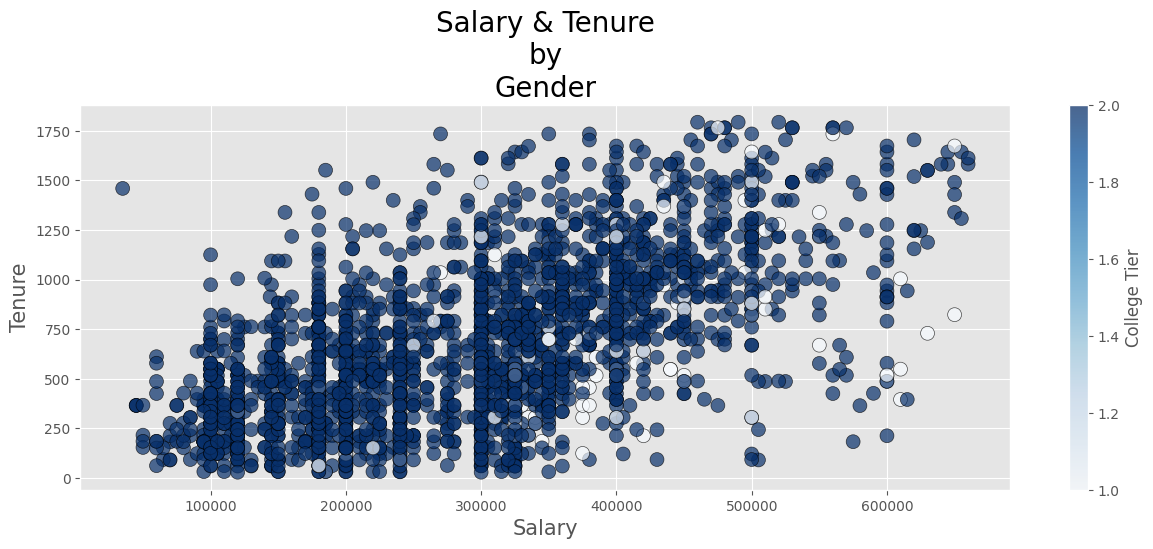

In [121]:
plt.figure(figsize = (15, 5))
plt.scatter(df_copy['Salary'], df_copy['Tenure'],
               ec = 'k',
               s = 100,
           c = df_copy['CollegeTier'],
           cmap = 'Blues',
           alpha = 0.7)
plt.colorbar(norm = True).set_label('College Tier')
plt.title('Salary & Tenure\nby\nGender', size = 20)
plt.xlabel('Salary', size = 15)
plt.ylabel('Tenure', size = 15)
plt.show()

**CONCLUSION** : Most of colleges are from tier 2

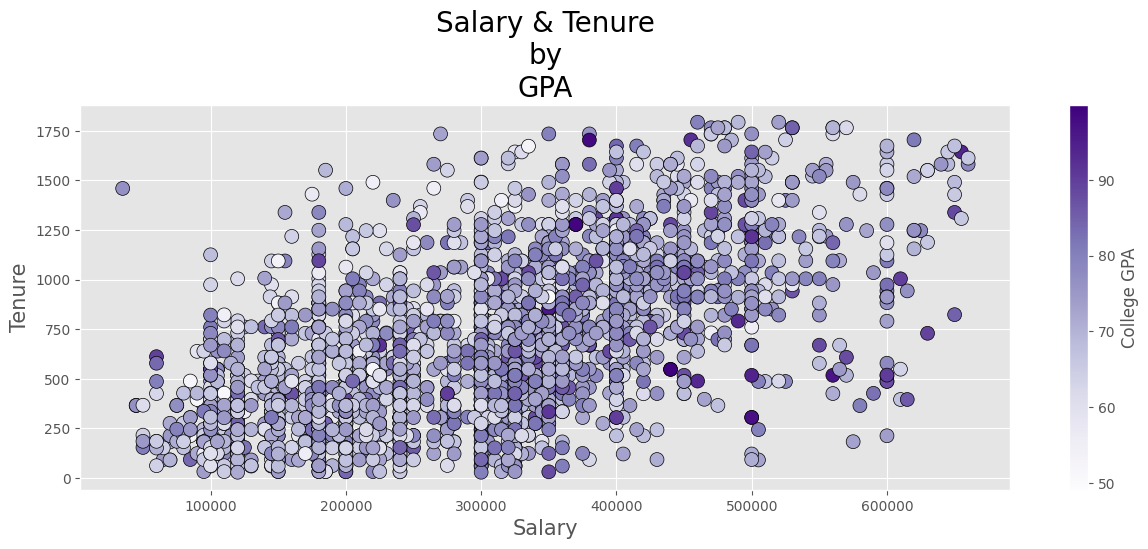

In [122]:
plt.figure(figsize = (15, 5))
plt.scatter(df_copy['Salary'], df_copy['Tenure'],
               ec = 'k',
           s = 100,
           c = df_copy['collegeGPA'],
           cmap = 'Purples')
plt.title('Salary & Tenure\nby\nGPA', size = 20)
plt.xlabel('Salary', size = 15)
plt.ylabel('Tenure', size = 15)
plt.colorbar().set_label('College GPA')
plt.show()

**CONCLUSION** : There are very less students with high salary, tenure and GPA

## Research Question

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Testing  of this claim with the data given is done below

In [123]:
df_S =data[(data['Specialization']== 'computer science & engineering')]
df_S

Salary        DOJ        DOL               Designation    JobCity   
0      420000 2012-06-01 2015-12-31                     other  bangalore  \
3     1100000 2011-07-01 2015-12-31  senior software engineer    gurgaon   
6      300000 2014-08-01 2015-05-01    java software engineer      other   
10     600000 2011-04-01 2015-04-01                     other  bangalore   
18     120000 2014-01-01 2014-06-01                     other    gurgaon   
...       ...        ...        ...                       ...        ...   
3984   480000 2011-12-01 2015-12-31         software engineer    gurgaon   
3985   430000 2013-03-01 2015-12-31           system engineer    gurgaon   
3989   300000 2014-09-01 2015-12-31         software engineer  bangalore   
3995   320000 2013-07-01 2015-12-31                     other  bangalore   
3996   200000 2014-07-01 2015-01-01        software developer      other   

     Gender        DOB  10percentage      10board  12graduation  12percentage   
0         f 1990-02-19         84.30        other          2007         95.80  \
3         m 1989-12-05         85.60         cbse          2007         83.60   
6         m 1993-02-01         86.08  state board          2010         67.50   
10        m 1989-06-24         88.60        other          2006         83.70   
18        m 1992-12-07         65.00  state board          2008         64.80   
...     ...        ...           ...          ...           ...           ...   
3984      f 1990-01-18         89.80         cbse          2007         83.80   
3985      f 1990-05-14         90.40         cbse          2007         87.00   
3989      m 1991-11-23         74.88  state board          2010         82.55   
3995      m 1991-07-03         81.86        other          2008         65.50   
3996      f 1992-03-20         78.72  state board          2010         69.88   

          12board CollegeTier       Degree                  Specialization   
0           other           2  B.Tech/B.E.  computer science & engineering  \
3            cbse           1  B.Tech/B.E.  computer science & engineering   
6     state board           2  B.Tech/B.E.  computer science & engineering   
10       mp board           2  B.Tech/B.E.  computer science & engineering   
18           icse           2  B.Tech/B.E.  computer science & engineering   
...           ...         ...          ...                             ...   
3984         cbse           2  B.Tech/B.E.  computer science & engineering   
3985         cbse           2  B.Tech/B.E.  computer science & engineering   
3989  state board           2  B.Tech/B.E.  computer science & engineering   
3995        other           2  B.Tech/B.E.  computer science & engineering   
3996  state board           2  B.Tech/B.E.  computer science & engineering   

      collegeGPA CollegeCityTier    CollegeState  GraduationYear  English   
0          78.00               0  andhra pradesh          2011.0      515  \
3          74.64               1           other          2011.0      635   
6          72.98               1       karnataka          2014.0      590   
10         74.90               0  madhya pradesh          2010.0      565   
18         69.54               0   uttar pradesh          2013.0      465   
...          ...             ...             ...             ...      ...   
3984       70.00               0         haryana          2011.0      535   
3985       77.00               0         haryana          2012.0      585   
3989       80.00               0       karnataka          2014.0      500   
3995       70.00               0           other          2012.0      475   
3996       70.42               1       karnataka          2014.0      450   

      Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon   
0         585    525  0.635979                445.0                      0  \
3         585    625  0.974396                615.0                      0   
6         435    380  0.3

In [133]:
df_R=df_S[(df_S["Designation"]=="programmer analyst")|(df_S["Designation"]=="software engineer")|(df_S["Designation"]=="hardware engineer")
       |(df_S["Designation"]=="associate engineer")]
df_R

Salary        DOJ        DOL         Designation    JobCity Gender   
19    325000 2014-09-01 2015-12-31   software engineer       pune      f  \
20    320000 2010-11-01 2012-09-01   software engineer  bangalore      f   
24    335000 2014-06-01 2015-06-01  programmer analyst  hyderabad      m   
31    340000 2014-08-01 2015-04-01   software engineer  bangalore      m   
36    270000 2013-03-01 2015-12-31   software engineer  hyderabad      f   
...      ...        ...        ...                 ...        ...    ...   
3968  360000 2013-05-01 2015-01-01   software engineer  bangalore      f   
3979  550000 2013-07-01 2014-04-01   software engineer  bangalore      m   
3981  220000 2014-09-01 2015-12-31   software engineer    gurgaon      m   
3984  480000 2011-12-01 2015-12-31   software engineer    gurgaon      f   
3989  300000 2014-09-01 2015-12-31   software engineer  bangalore      m   

            DOB  10percentage      10board  12graduation  12percentage   
19   1990-11-30         79.00         cbse          2008         62.20  \
20   1988-07-25         91.20        other          2006         84.63   
24   1993-06-28         88.00  state board          2010         90.00   
31   1992-10-23         77.20  state board          2010         86.10   
36   1992-08-21         91.50  state board          2009         93.80   
...         ...           ...          ...           ...           ...   
3968 1990-09-30         81.00         cbse          2008         75.60   
3979 1989-07-22         69.16     up board          2006         65.66   
3981 1991-12-17         53.40         cbse          2009         65.40   
3984 1990-01-18         89.80         cbse          2007         83.80   
3989 1991-11-23         74.88  state board          2010         82.55   

          12board CollegeTier        Degree                  Specialization   
19           cbse           2   B.Tech/B.E.  computer science & engineering  \
20          other           2   B.Tech/B.E.  computer science & engineering   
24    state board           2   B.Tech/B.E.  computer science & engineering   
31    state board           2   B.Tech/B.E.  computer science & engineering   
36    state board           1   B.Tech/B.E.  computer science & engineering   
...           ...         ...           ...                             ...   
3968         cbse           2   B.Tech/B.E.  computer science & engineering   
3979     up board           1  M.Tech./M.E.  computer science & engineering   
3981         cbse           2   B.Tech/B.E.  computer science & engineering   
3984         cbse           2   B.Tech/B.E.  computer science & engineering   
3989  state board           2   B.Tech/B.E.  computer science & engineering   

      collegeGPA CollegeCityTier    CollegeState  GraduationYear  English   
19         76.30               0   uttar pradesh          2012.0      485  \
20         78.15               0       karnataka          2010.0      455   
24         76.00               1       telangana          2014.0      625   
31         71.00               0      tamil nadu          2014.0      560   
36         74.10               1       telangana          2013.0      380   
...          ...             ...             ...             ...      ...   
3968       73.86               0   uttar pradesh          2012.0      425   
3979       77.50               0   uttar pradesh          2013.0      395   
3981       71.20               0  madhya pradesh          2013.0      560   
3984       70.00               0         haryana          2011.0      535   
3989       80.00               0       karnataka          2014.0      500   

      Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon   
19        445    435  0.864685                525.0                      0  \
20        535    445  0.635979                445.0                      0   
24        555    630  0.356536                475.0                      0   
31        485    4

C:\Users\Mahima Churi\AppData\Local\Temp\ipykernel_9268\1132520425.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


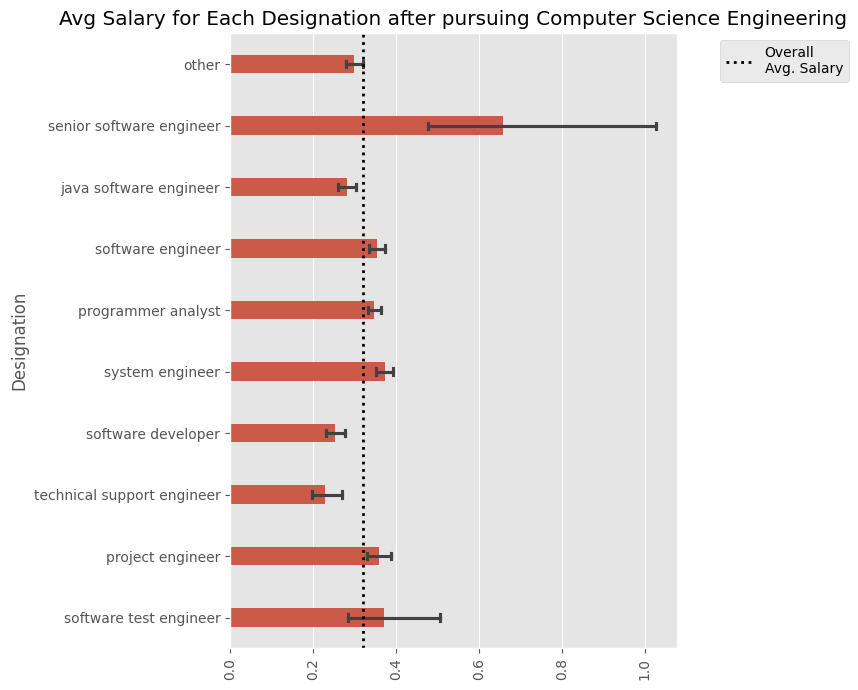

In [164]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='Salary', y='Designation',
            data=df_S,
            capsize=0.1,
            width=0.3,
            ax=ax)
ax.axvline(df_S['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
ax.set_title('Avg Salary for Each Designation after pursuing Computer Science Engineering')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [134]:
df_R["Salary"]

19      325000
20      320000
24      335000
31      340000
36      270000
         ...  
3968    360000
3979    550000
3981    220000
3984    480000
3989    300000
Name: Salary, Length: 290, dtype: int64

In [135]:
ab=df_R["Salary"]
bc=[]
for i in ab:
    bc.append(i)
print(bc)
    

[325000, 320000, 335000, 340000, 270000, 380000, 390000, 400000, 250000, 800000, 330000, 500000, 325000, 375000, 235000, 450000, 410000, 440000, 325000, 360000, 550000, 265000, 170000, 305000, 560000, 305000, 300000, 785000, 330000, 210000, 460000, 320000, 275000, 300000, 300000, 475000, 240000, 335000, 335000, 300000, 400000, 345000, 300000, 450000, 500000, 450000, 370000, 305000, 180000, 360000, 300000, 400000, 400000, 320000, 375000, 345000, 420000, 215000, 350000, 305000, 180000, 325000, 350000, 340000, 325000, 435000, 360000, 310000, 350000, 240000, 400000, 430000, 85000, 330000, 200000, 420000, 335000, 515000, 350000, 275000, 395000, 240000, 300000, 315000, 450000, 800000, 370000, 325000, 350000, 450000, 240000, 335000, 415000, 420000, 120000, 300000, 375000, 275000, 335000, 350000, 400000, 275000, 450000, 350000, 335000, 300000, 305000, 330000, 120000, 305000, 190000, 300000, 475000, 315000, 475000, 560000, 450000, 300000, 620000, 410000, 480000, 310000, 120000, 330000, 300000, 

In [136]:
import random
n=40  #taking few samples for observation out of 662
cd=random.sample(bc,n)
print(cd)

[490000, 100000, 325000, 1000000, 275000, 250000, 170000, 320000, 300000, 330000, 360000, 360000, 180000, 350000, 325000, 280000, 240000, 105000, 335000, 305000, 305000, 405000, 400000, 500000, 590000, 390000, 375000, 400000, 335000, 240000, 400000, 325000, 240000, 350000, 250000, 350000, 300000, 480000, 880000, 785000]


In [137]:

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

# Measures how many standard errors the sample mean is away from the population mean. 

In [138]:
from scipy.stats import t,norm
import statistics

In [139]:
sum(cd)/len(cd)

367500.0

In [140]:
statistics.stdev(cd)

180686.0146703001

In [147]:
sample_size = 100
sample_mean =333500.0
pop_mean = 300000
sample_std=131315.82

In [148]:
t_value = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t_value)

2.5511016113671605


In [149]:
confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha/2,df=99) 

print(t_critical)

1.9842169515086827


Text(333500.0, 0.7, 'x_bar')

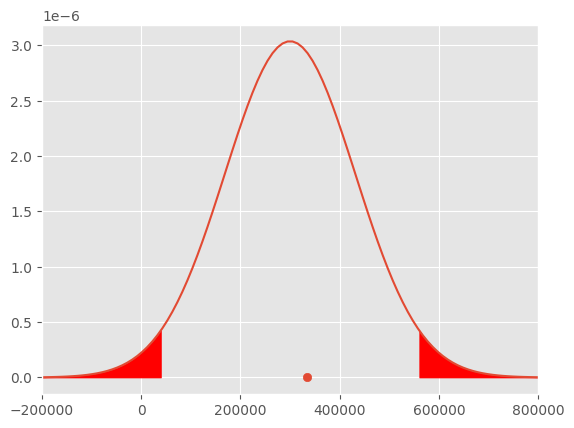

In [150]:
x_min = -200000
x_max = 800000

mean = pop_mean
std = sample_std 

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.7))

In [151]:
if(t_value < t_critical):
    print("There is not enough evidence to reject Null Hypothesis")
else:
    print("There is sufficient evidence to reject Null Hypothesis")

There is sufficient evidence to reject Null Hypothesis


In [152]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_value)))

print("p_value = ", p_value)

if(p_value > alpha):
    print("There is not enough evidence to reject Null Hypothesis")
else:
    print("There is sufficient evidence to reject Null Hypothesis")

p_value =  0.01073830132615261
There is sufficient evidence to reject Null Hypothesis


### Observation:
- As the result of the hypothesis testing we see that the claim is false. 
- For this claim Null Hupothesis fails but alternate hypothesis passed.
- The t-test and probability value i.e.,p_value claiming it as wrong.

### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [153]:
from scipy.stats import chi2, chi2_contingency

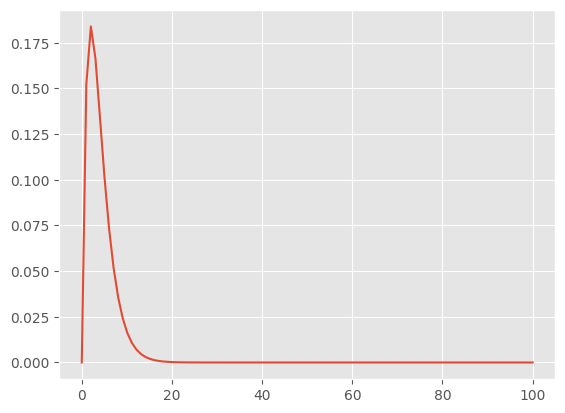

In [154]:
x = np.linspace(0,100, 100)
y = chi2.pdf(x, df=4)
plt.plot(x, y)

In [155]:
obsr = pd.crosstab(data.Specialization,data.Gender)
obsr

Gender                                    f    m
Specialization                                  
computer application                     55  177
computer science & engineering          347  949
electronics & telecommunications        236  739
electronics and electrical engineering   49  215
information technology                  172  477
mechanical engineering                   10  184
other                                    63  191

In [156]:
chi2_contingency(obsr)

Chi2ContingencyResult(statistic=49.676947087423144, pvalue=5.4568464115548805e-09, dof=6, expected_freq=array([[ 55.95859213, 176.04140787],
       [312.59627329, 983.40372671],
       [235.17080745, 739.82919255],
       [ 63.67701863, 200.32298137],
       [156.53933747, 492.46066253],
       [ 46.79296066, 147.20703934],
       [ 61.26501035, 192.73498965]]))

In [157]:
chi2_test_stat = chi2_contingency(obsr)[0]
pval = chi2_contingency(obsr)[1]
data = chi2_contingency(obsr)[2]

In [158]:
confidence_level = 0.95

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, data)

chi2_critical

12.591587243743977

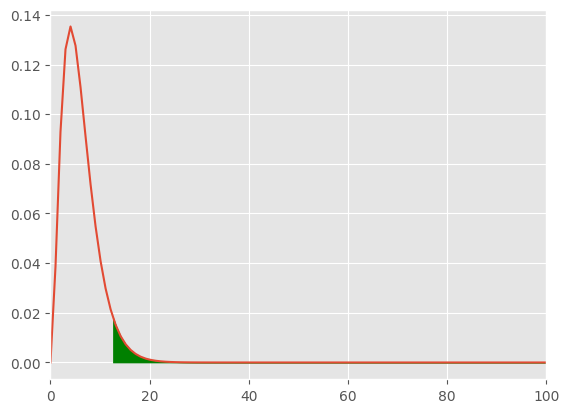

In [159]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, data)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, data)
plt.fill_between(x1, y1, color='green')

In [160]:
if(chi2_test_stat > chi2_critical):
    print("There is not enough evidence to reject Null Hypothesis")
else:
    print("There is sufficient evidence to reject Null Hypothesis")

There is not enough evidence to reject Null Hypothesis


In [161]:
if(pval < alpha):
    print("There is not enough evidence to reject Null Hypothesis")
else:
    print("There is sufficient evidence to reject Null Hypothesis")

There is not enough evidence to reject Null Hypothesis


### Observation
- As the result of the second research question we see that there is a relationship between Gender and specialization.
- We test this claim through Chi-Square test and find the result that both the categorical variables are dependent on each other.
- Some specialization or working field does not allow some candidates to work in that field due to some risks.

## Conclusion

## Data understanding:
####  The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – Logical skills, technical skills and Vocabulary skills (English). 
## Data manipulation:
#### The Data set contains the 4000 rows and 40 columns and the this data set is having so many duplicate  values, frist we to manipulate the data set and remove unwanted rows and columns after  that check the any nan values are there or not and  after that we need to take the cleaned data set to do visualization.
## Data Visualization:
### Univariate Analysis -> PDF, Histograms, Boxplots, Countplots
#### univariate analysis having many plots  and it shows the  probability and frequency distribution
### Bivariate Analysis -> Scatterplot,piecharts,barplot,boxplot
#### The overarching goal of our project involves analyzing employee data to compare various percentage metrics. One aspect of our analysis includes identifying outliers within the dataset using boxplots. Also we do many other analysis by keeping Salary as the main element apart from that, we aim to determine which cities have a higher concentration of employees by utilizing countplots, specifically focusing on job locations.

## Bonus Research Question


#### In a comparative study of recruitment practices among leading companies, does AMEO's hiring policy of recruiting candidates with a minimum percentage of 70% and maintaining an average percentage of 80% hold true?

In [128]:
average_percentage = data['12percentage'].mean()
average_percentage

74.51477225672876

### Interpreting the Difference 

In [132]:
#Stated Goal = 80%
Difference = 80 - 74.51477
Difference

5.485230000000001

#### Since the difference is positive (5.5), it indicates that the average percentage obtained (74.5%) is below the stated goal of 80%.

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

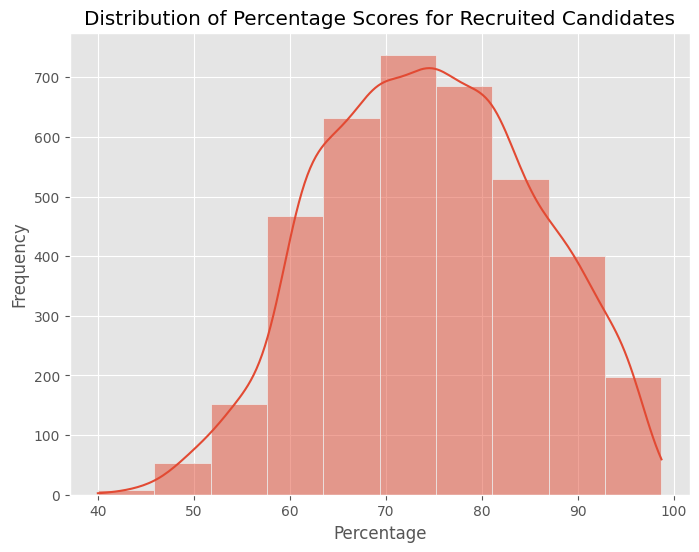

In [130]:
plt.figure(figsize=(8, 6))
sns.histplot(data['12percentage'], bins=10, kde=True)
plt.title('Distribution of Percentage Scores for Recruited Candidates')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

In [131]:
if average_percentage < 80:
    print("Recommendation: AMEO should consider revising its minimum percentage requirement or implementing additional screening processes to improve the quality of recruited candidates.")
else:
    print("No specific recommendation.")


Recommendation: AMEO should consider revising its minimum percentage requirement or implementing additional screening processes to improve the quality of recruited candidates.


#### Observation: AMEO should consider revising its minimum percentage requirement or implementing additional screening processes to improve the quality of recruited candidates.